# 1. EDA
# ===============
## 1.1. Form analysis :

#### -Target: 
- 'diagnosis'
#### - Columns,  rows 
- (569, 33) 
#### - Type of variable : 
- float64    31
- int64       1
- object      1

#### - Missing values: 
- only few NaNs (except fo a couple of rows at the end that only contains NaNs)
- 3 groups of columns : mean, SE (Standard Error), worst (mean of the three largest values)

## 1.2. Content analysis: 

#### - Target visualization (Histogram/Boxplot): 
- B (negatives)    0.627417
- M (positives)    0.372583

#### - Understanding the different variables:  
- The data refers to size and appearance parameter of cancer cells
- Understanding the different variables: 
    - radius: /
    - 'texture': damage of the cell, holes, particles stuck in the membrane. the higher the value, the rougher / more heterogenous the membrane
    - 'perimeter': /
    - 'area': /
    - 'smoothness': average of local discrepencies on the cell surface. the smaller the value, the smoothest
    - 'compactness': ratio of the area of a cell with the area of a circle with the same perimeter as the cell
    - 'concavity': /
    - 'concave points': /
    - 'symmetry': the higher value, the more symetrical the cells
    - 'fractal_dimension': evaluate the complexity and irregularities of a cell membrane. the higher the value, the more complex the membrane
    - Continuous non-standardized, sometimes skewed 
    
#### - Features - target relation (Histo/Boxplot): 
- Several variables tend to show differences of mean and/or SD between M and B cells:
    
    - DIFFERENCE OF MEAN AND SD
        radius, perimeter, area, concavity, concave points and compactness seems
            
    - DIFFERENCE OF MEAN
        texture, smoothness, symetry (slight difference only)
            
    - NO APPARENT DIFFERENCE:
        fractal dimension 

#### - Outliers: ???


## 1.3. First conclusion : 
 
- The 3 groups of variable are distributed differently, notably the SE group
- I identified several interesting variables that potentially play a key role in the prediction
    
## 1.4. Detailled analysis

#### - variable / variable relationship : 
- High corralation (>=0.8) between:
    - radius / perimeter / area / concave point
    - compactness / concave point / concavity
- mild correlation (0.6 < x < 0.8) between:
    - concave points / radius, perimeter, area

#### - NaN analyse: 
/

## 1.5. Non-null hypothesis (H0): 
- The values related to the cell shapes are different between cell types B and M.
    - H0: The values related to the shapes are the same between cell types B and M (fractal dimension).
        - Rejected in some cases (all except fractal dimension).

- The values of cell type M are significantly different compared to cell type B.

# 2. Pre processing
- Creation of the training set and the test set
- Handling missing values: dropna(), imputation, empty columns
- Encoding

# 3. Pre-Modeling
### 3.1. Creating an Initial Model
- Initial test modeling with DecisionTreeClassifier
- Evaluation procedure (defining an evaluation function)

### 3.2. Improving Model Performance
- Removing outliers
- Feature selection
- Feature engineering
- Feature scaling
- Data leakage prevention
- Boosting / Bagging
    ==> Training different models
    ==> Optimization with GridSearchCV
    ==> (optional) Revisiting pre-processing / EDA
    ==> Learning curves and decision-making

#### Decision tree:
- Underfitting:
    - Polynomial features
    - Feature engineering
    - More complex model

- Overfitting:
    - Imputation / fillna
    - SelectionFromModel
    - Regularization

# 4. Modeling
- Defining an evaluation function
- Training different models
- Optimization with GridSearchCV
- (optional) Error analysis and revisiting Pre-Processing / EDA
- Learning Curve and decision-making


# 1. Exploratory Data Analysis

## 1.1. Form analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
file='C:\\Users\\Lenovo\\Documents\\Programmation_Python\\Datasets\\Cancer\\Cancer_Data.csv'
df=pd.read_csv(file)
df.shape

(569, 33)

In [3]:
pd.set_option('display.max_columns', None)
df.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   
5         0.2087                 0.07613     0.3345      0.8902         2.217   
6         0.1794                 0.05742     0.4467      0.7732         3.180   
7         0.2196                 0.07451     0.5835      1.3770         3.856   
8         0.2350                 0.07389     0.3063      1.0020         2.406   
9         0.2030                 0.08243     0.2976      1.5990         2.039   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   
5    27.19       0.007510         0.03345       0.03672            0.01137   
6    53.91       0.004314         0.01382       0.02254            0.01039   
7    50.96       0.008805         0.03029       0.02488            0.01448   
8    24.32       0.005731         0.03502       0.03553            0.01226   
9    23.94       0.007149         0.07217       0.07743            0.01432   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   
5      0.02165              0.005082         15.47          23.75   
6      0.01369              0.002179         22.88       

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

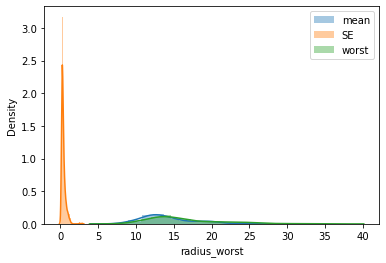

In [6]:
sns.distplot(df['radius_mean'], label='mean')
sns.distplot(df['radius_se'], label='SE')
sns.distplot(df['radius_worst'], label='worst')
plt.legend()

In [5]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<AxesSubplot:>

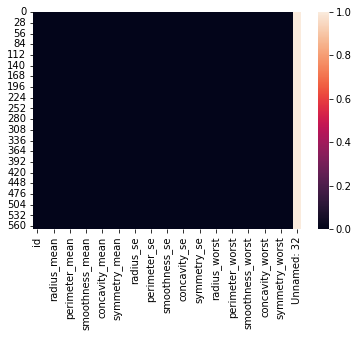

In [6]:
sns.heatmap(df.isna())

([<matplotlib.patches.Wedge at 0x19fbd2f7040>,
 [Text(-1.0943562456479174, 0.111285253342008, ''),
  Text(1.0943562352286353, -0.11128535580303443, '')])

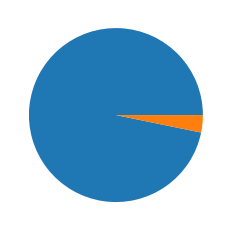

In [112]:
plt.pie(df.dtypes.value_counts())

In [8]:
df.dtypes.value_counts()

float64    31
int64       1
object      1
dtype: int64

## 1.2. Content analysis

In [9]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [6]:
# We create a df containing only positive cases or only negatives cases
positive_df = df[df['diagnosis']=='M']
negative_df = df[df['diagnosis']=='B']

In [7]:
positive_df=positive_df.drop('diagnosis', axis=1)
negative_df=negative_df.drop('diagnosis', axis=1)

In [8]:
positive_df=positive_df.drop(['id', 'Unnamed: 32'], axis=1)
negative_df=negative_df.drop(['id', 'Unnamed: 32'], axis=1)

In [9]:
negative_df

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
19        13.540         14.36           87.46      566.3          0.09779   
20        13.080         15.71           85.63      520.0          0.10750   
21         9.504         12.44           60.34      273.9          0.10240   
37        13.030         18.42           82.61      523.8          0.08983   
46         8.196         16.84           51.71      201.9          0.08600   
..           ...           ...             ...        ...              ...   
558       14.590         22.68           96.39      657.1          0.08473   
559       11.510         23.93           74.52      403.5          0.09261   
560       14.050         27.15           91.38      600.4          0.09929   
561       11.200         29.37           70.67      386.0          0.07449   
568        7.760         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
19            0.08129         0.06664             0.047810         0.1885   
20            0.12700         0.04568             0.031100         0.1967   
21            0.06492         0.02956             0.020760         0.1815   
37            0.03766         0.02562             0.029230         0.1467   
46            0.05943         0.01588             0.005917         0.1769   
..                ...             ...                  ...            ...   
558           0.13300         0.10290             0.037360         0.1454   
559           0.10210         0.11120             0.041050         0.1388   
560           0.11260         0.04462             0.043040         0.1537   
561           0.03558         0.00000             0.000000         0.1060   
568           0.04362         0.00000             0.000000         0.1587   

     fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
19                  0.05766     0.2699      0.7886         2.058   23.560   
20                  0.06811     0.1852      0.7477         1.383   14.670   
21                  0.06905     0.2773      0.9768         1.909   15.700   
37                  0.05863     0.1839      2.3420         1.170   14.160   
46                  0.06503     0.1563      0.9567         1.094    8.205   
..                      ...        ...         ...           ...      ...   
558                 0.06147     0.2254      1.1080         2.224   19.540   
559                 0.06570     0.2388      2.9040         1.936   16.970   
560                 0.06171     0.3645      1.4920         2.888   29.840   
561                 0.05502     0.3141      3.8960         2.041   22.810   
568                 0.05884     0.3857      1.4280         2.548   19.150   

     smoothness_se  compactness_se  concavity_se  concave points_se  \
19        0.008462        0.014600       0.02387           0.013150   
20        0.004097        0.018980       0.01698           0.006490   
21        0.009606        0.014320       0.01985           0.014210   
37        0.004352        0.004899       0.01343           0.011640   
46        0.008968        0.016460       0.01588           0.005917   
..             ...             ...           ...                ...   
558       0.004242        0.046390       0.06578           0.016060   
559       0.008200        0.029820       0.05738           0.012670   
560       0.007256        0.026780       0.02071           0.016260   
561       0.007594        0.008878       0.00000           0.000000   
568       0.007189        0.004660       0.00000           0.000000   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
19       0.01980              0.002300        15.110          19.26   
20       0.01678              0.002425        14.500          20.49   
21       0.02027              0.002968        10.230          15.66   
37       0.02671              0.001777        13.300          22.81   
46       0

In [10]:
df=df.drop(['id', 'Unnamed: 32'], axis=1)

In [11]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [17]:
for col in dfm_columns:
    plt.figure()
    print(sns.distplot(positive_df[col], label='positive'))
    print(sns.distplot(negative_df[col], label='negative'))
    plt.legend()

NameError: name 'dfm_columns' is not defined

In [12]:
df_without_diagnosis=df.drop('diagnosis', axis=1)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14212\893038975.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


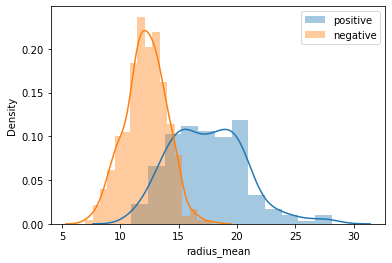

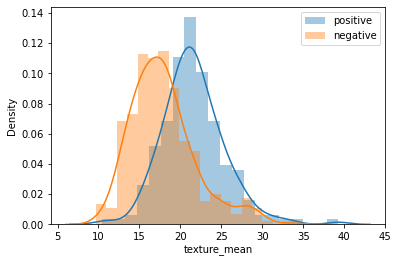

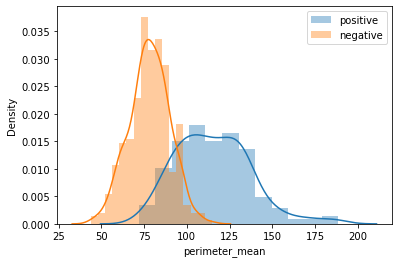

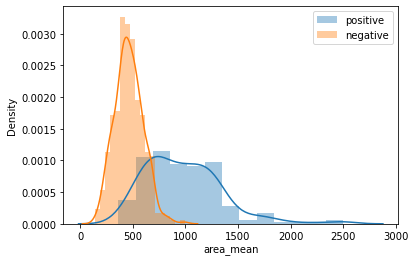

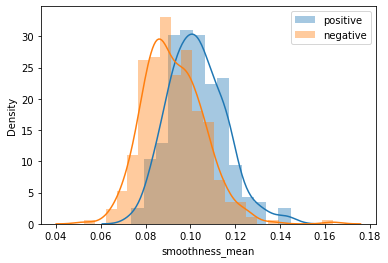

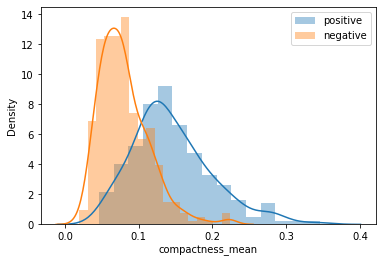

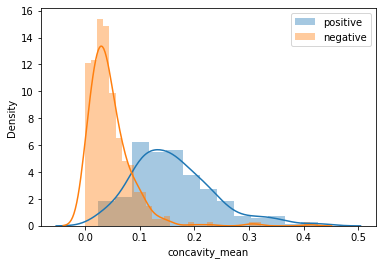

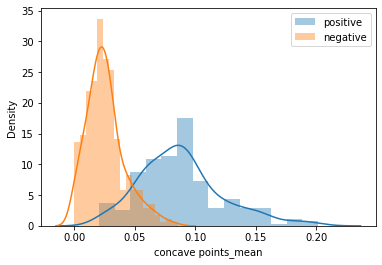

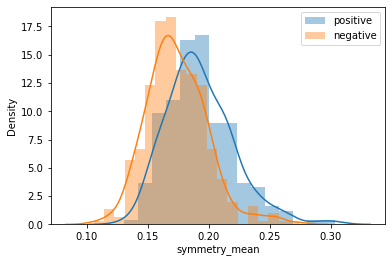

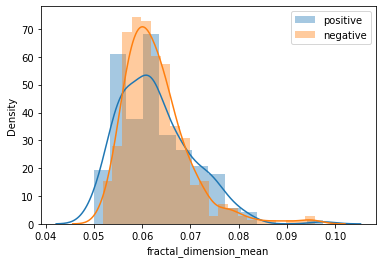

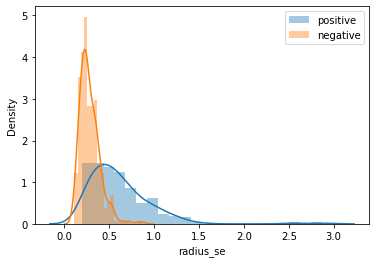

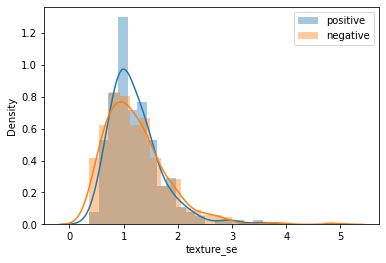

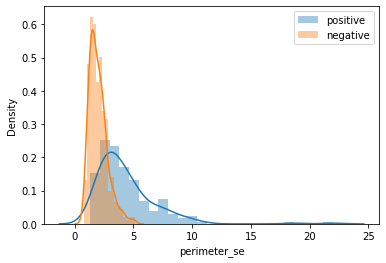

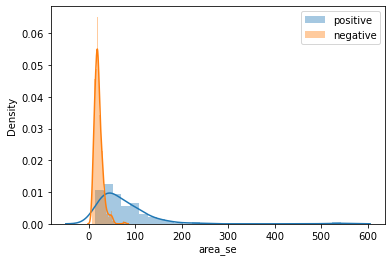

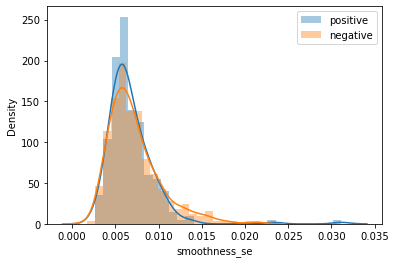

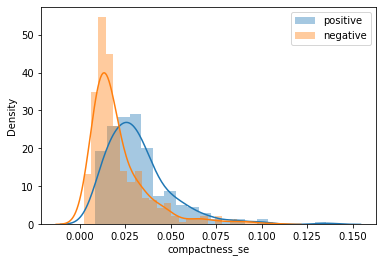

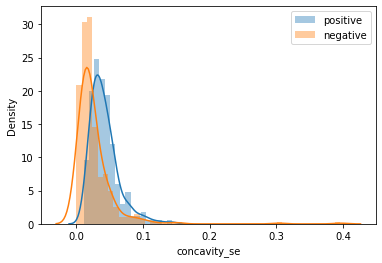

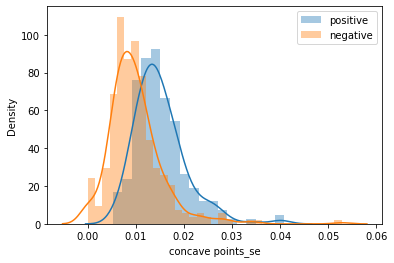

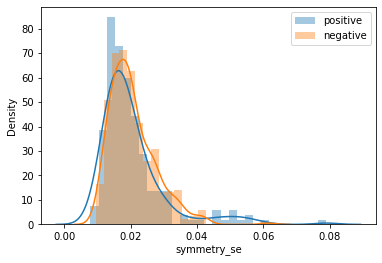

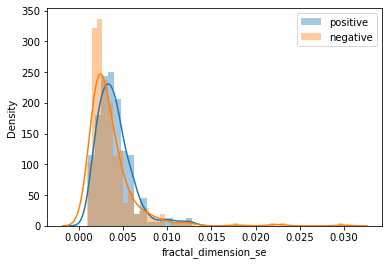

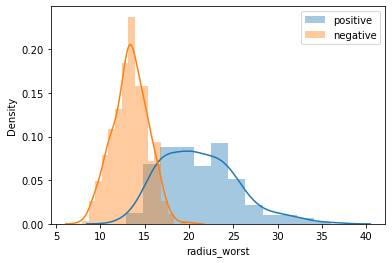

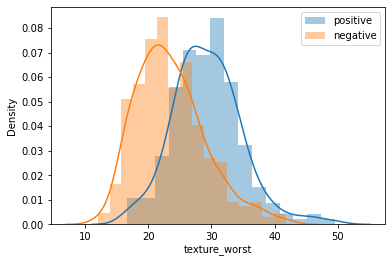

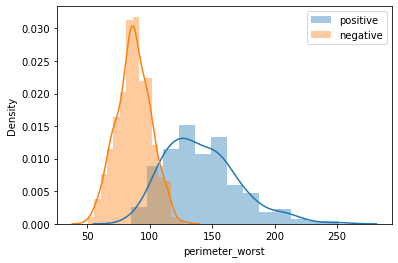

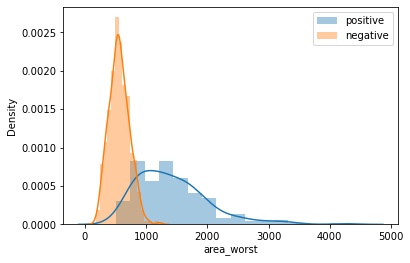

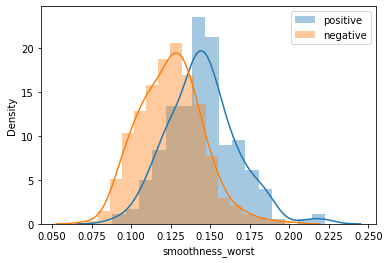

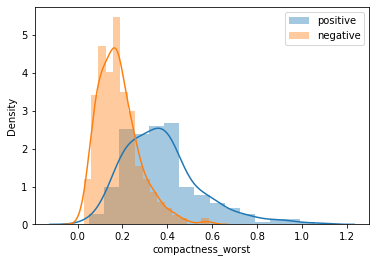

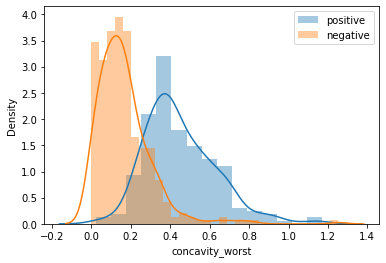

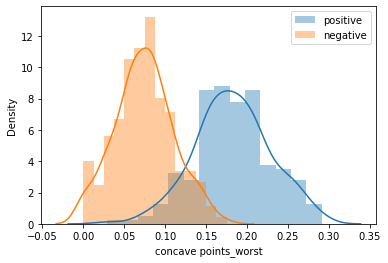

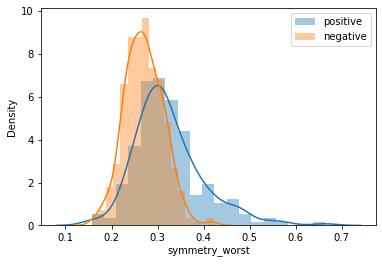

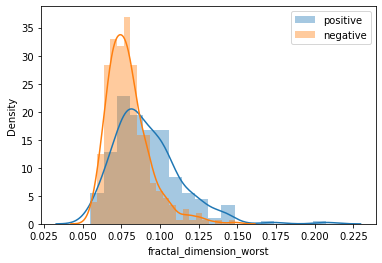

In [19]:
for col in df_without_diagnosis.columns:
    plt.figure()
    print(sns.distplot(positive_df[col], label='positive'))
    print(sns.distplot(negative_df[col], label='negative'))
    plt.legend()

## 1.3. First conclusions
Here we can see that our distribution varies between our two groups (positive & negative)

In [24]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## 1.4. Detailled analysis

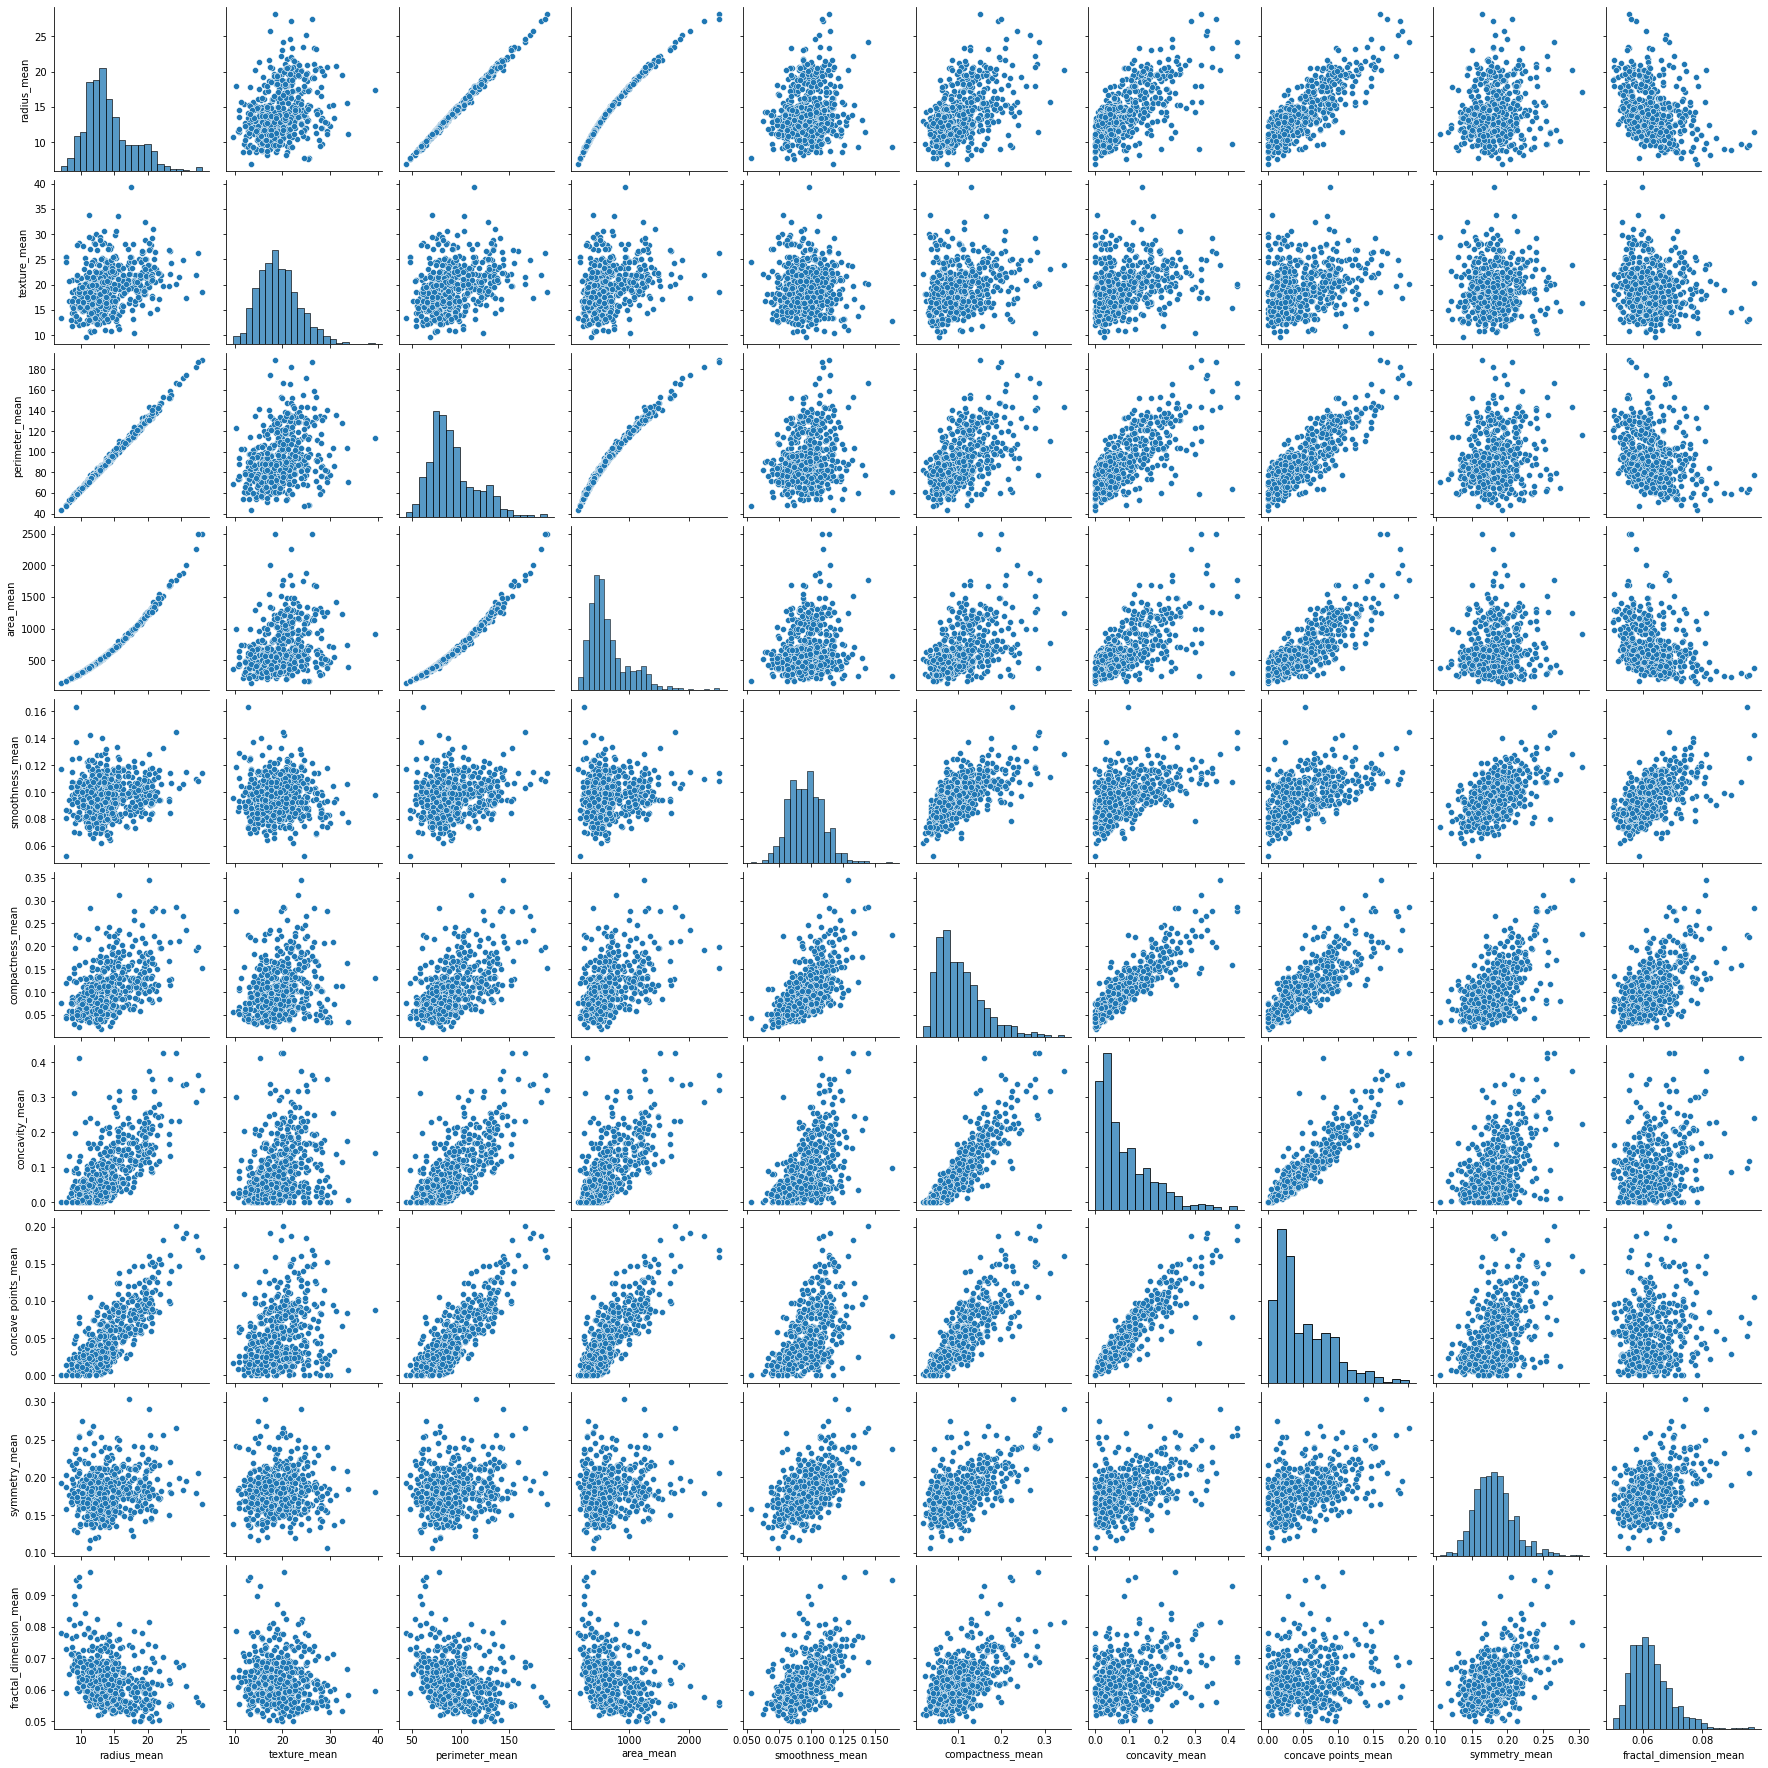

In [94]:
sns.pairplot(dfm)

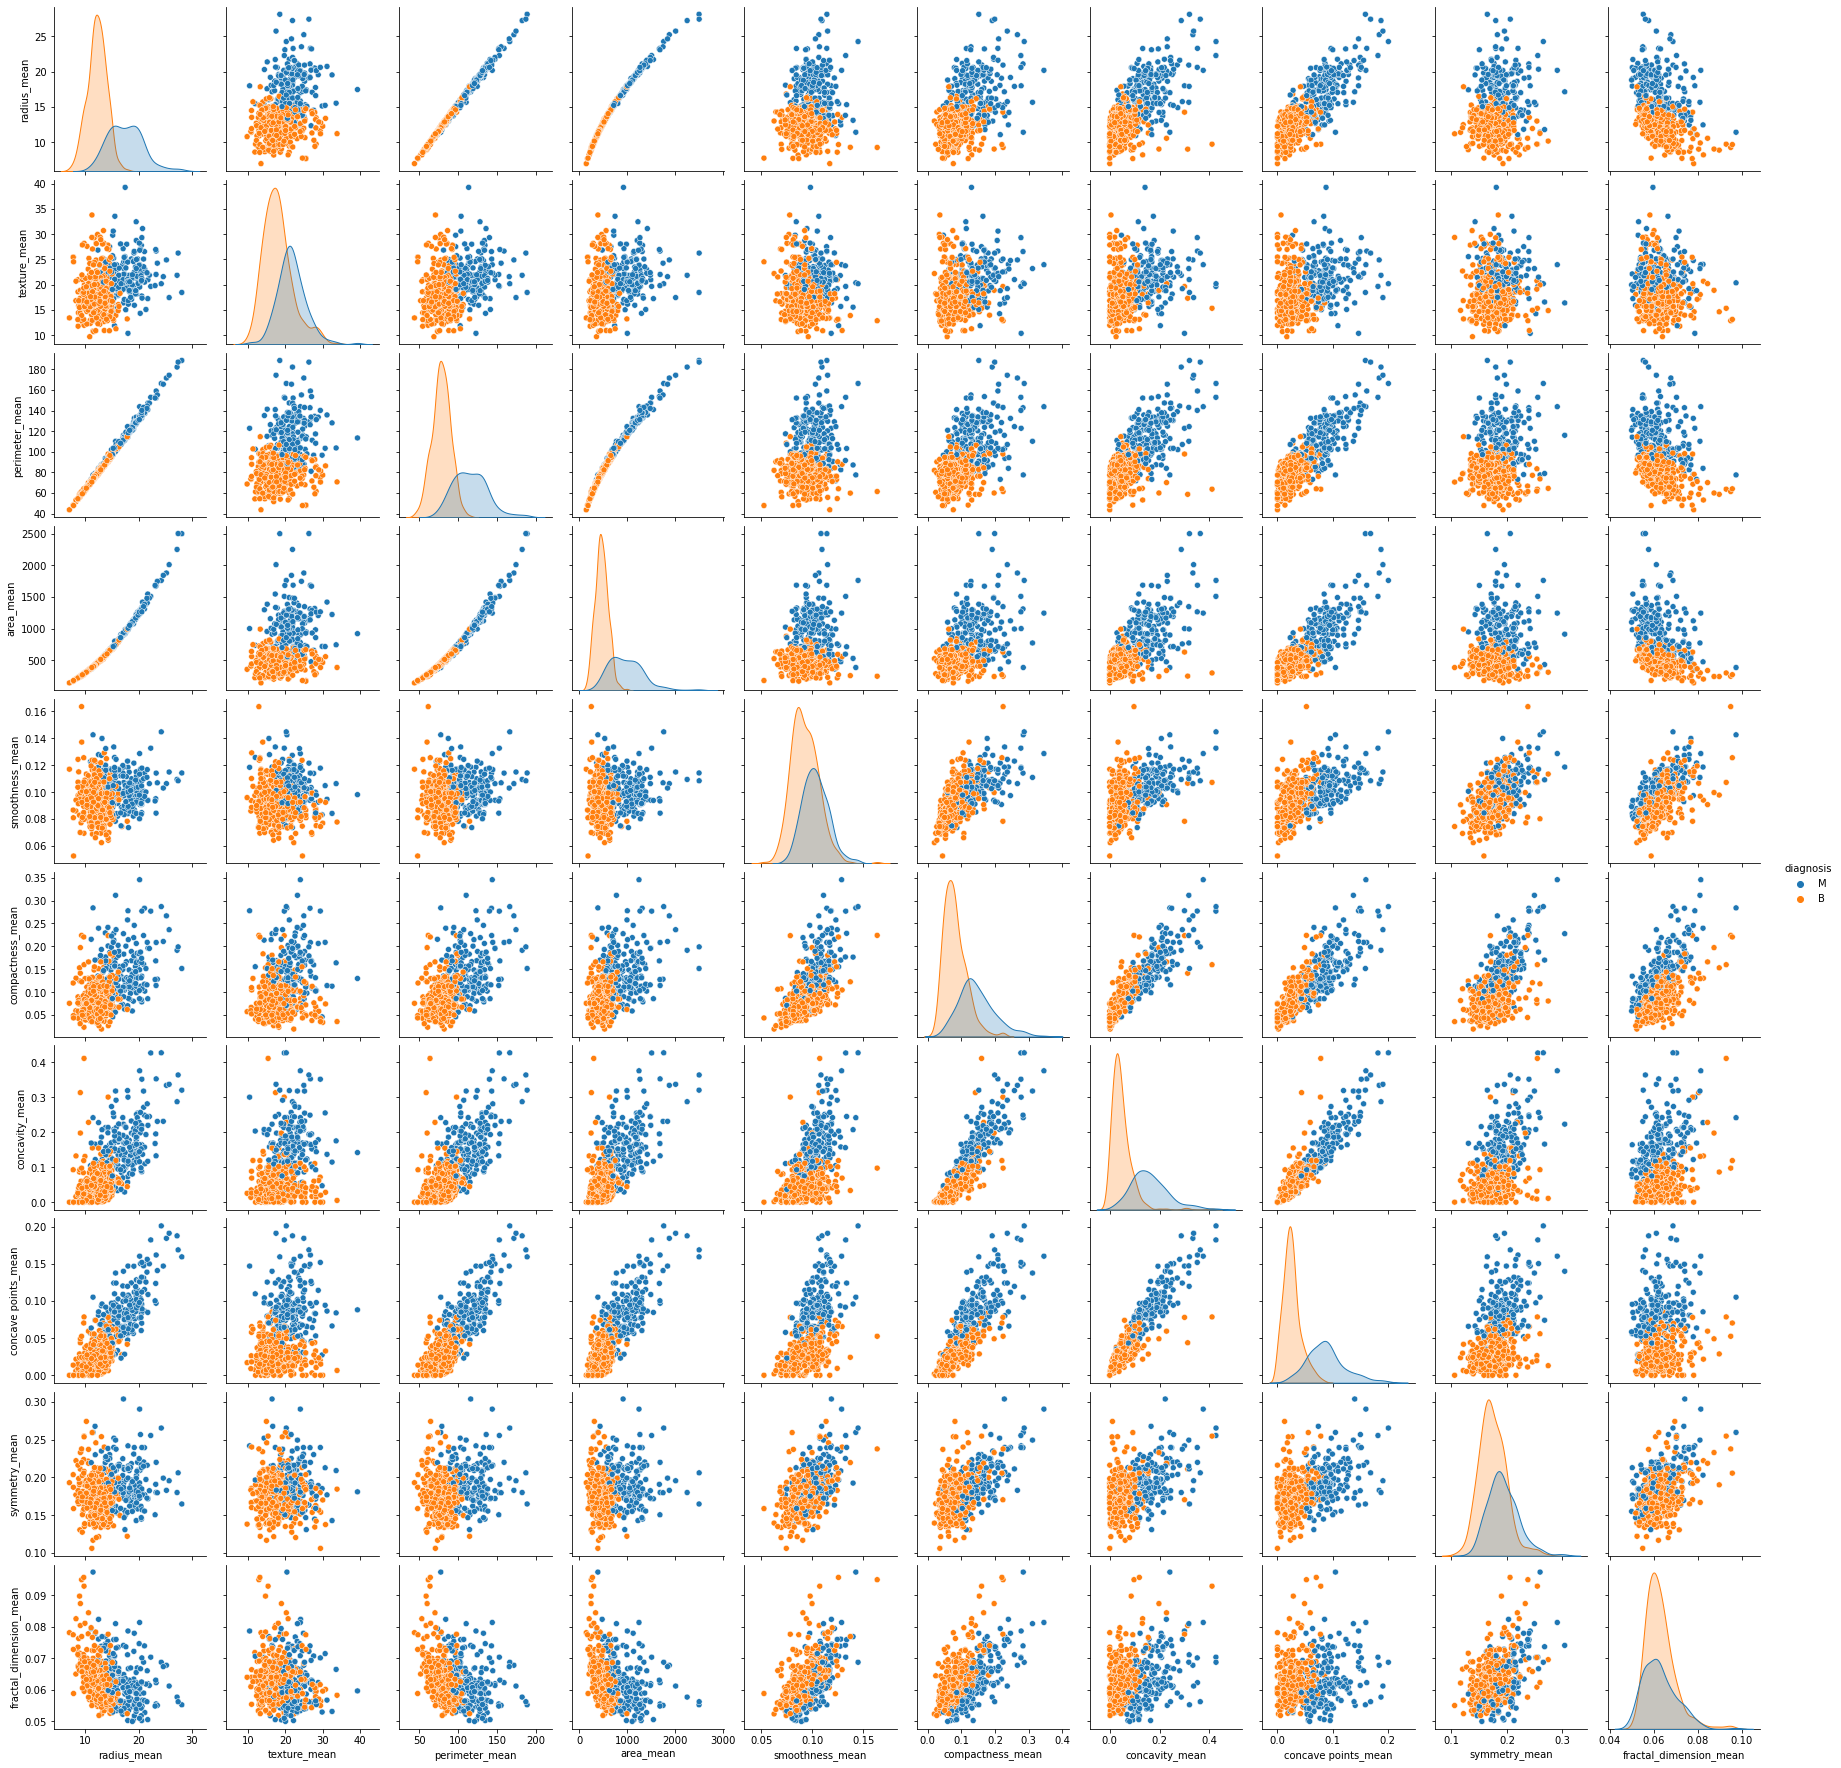

In [95]:
sns.pairplot(df, hue='diagnosis')

<AxesSubplot:>

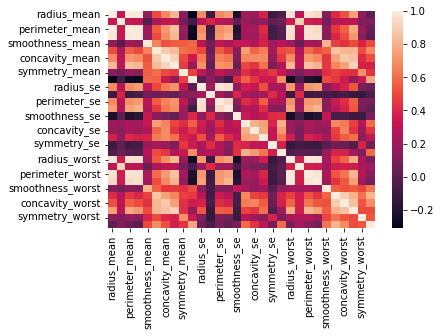

In [25]:
sns.heatmap(df.corr())

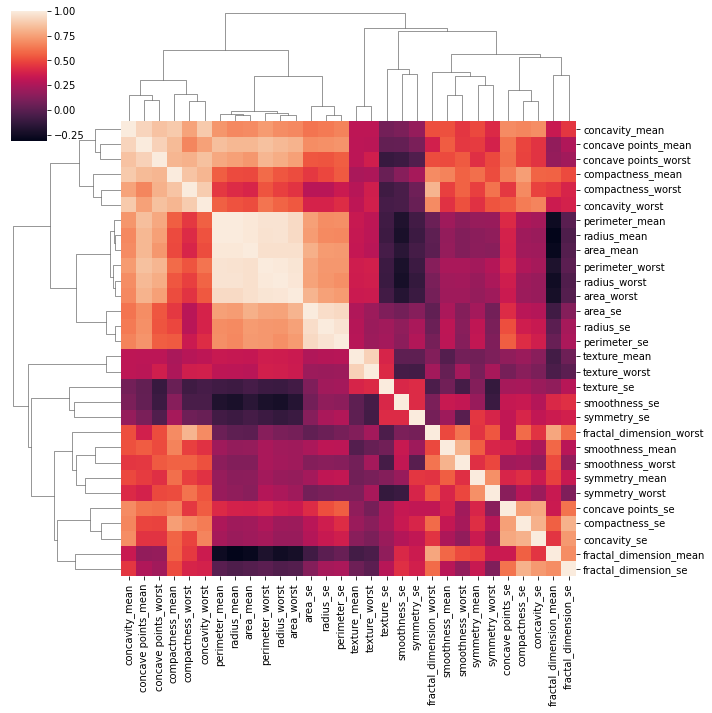

In [26]:
sns.clustermap(df.corr())

In [27]:
df.corr()

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se               0.380676          0.642262        0.683260   
symmetry_se                    

In [28]:
df.corr() >= 0.8

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                     True         False            True       True   
texture_mean                   False          True           False      False   
perimeter_mean                  True         False            True       True   
area_mean                       True         False            True       True   
smoothness_mean                False         False           False      False   
compactness_mean               False         False           False      False   
concavity_mean                 False         False           False      False   
concave points_mean             True         False            True       True   
symmetry_mean                  False         False           False      False   
fractal_dimension_mean         False         False           False      False   
radius_se                      False         False           False      False   
texture_se                     False         False           False      False   
perimeter_se                   False         False           False      False   
area_se                        False         False           False       True   
smoothness_se                  False         False           False      False   
compactness_se                 False         False           False      False   
concavity_se                   False         False           False      False   
concave points_se              False         False           False      False   
symmetry_se                    False         False           False      False   
fractal_dimension_se           False         False           False      False   
radius_worst                    True         False            True       True   
texture_worst                  False          True           False      False   
perimeter_worst                 True         False            True       True   
area_worst                      True         False            True       True   
smoothness_worst               False         False           False      False   
compactness_worst              False         False           False      False   
concavity_worst                False         False           False      False   
concave points_worst           False         False           False      False   
symmetry_worst                 False         False           False      False   
fractal_dimension_worst        False         False           False      False   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                        False             False           False   
texture_mean                       False             False           False   
perimeter_mean                     False             False           False   
area_mean                          False             False           False   
smoothness_mean                     True             False           False   
compactness_mean                   False              True            True   
concavity_mean                     False              True            True   
concave points_mean                False              True            True   
symmetry_mean                      False             False           False   
fractal_dimension_mean             False             False           False   
radius_se                          False             False           False   
texture_se                         False             False           False   
perimeter_se                       False             False           False   
area_se                            False             False           False   
smoothness_se                      False             False           False   
compactness_se                     False             False           False   
concavity_se                       False             False           False   
concave points_se                  False             False           False   
symmetry_se                    

## 1.5. Non-null hypothesis

H0: The values related to the shapes are the same between cell types B and M (fractal dimension).

In [13]:
from scipy.stats import ttest_ind

In [14]:
positive_df.shape

(212, 30)

In [16]:
positive_df.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
0                 0.07871     1.0950      0.9053         8.589   153.40   
1                 0.05667     0.5435      0.7339         3.398    74.08   
2                 0.05999     0.7456      0.7869         4.585    94.03   
3                 0.09744     0.4956      1.1560         3.445    27.23   
4                 0.05883     0.7572      0.7813         5.438    94.44   

   smoothness_se  compactness_se  concavity_se  concave points_se  \
0       0.006399         0.04904       0.05373            0.01587   
1       0.005225         0.01308       0.01860            0.01340   
2       0.006150         0.04006       0.03832            0.02058   
3       0.009110         0.07458       0.05661            0.01867   
4       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [17]:
negative_df.shape

(357, 30)

In [18]:
# We have to reshape the array because we want to work with same shape arrays
negative_df.sample(positive_df.shape[0])

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
305        11.60         24.49           74.23      417.2          0.07474   
428        11.13         16.62           70.47      381.1          0.08151   
187        11.71         17.19           74.68      420.3          0.09774   
357        13.87         16.21           88.52      593.7          0.08743   
484        15.73         11.28          102.80      747.2          0.10430   
..           ...           ...             ...        ...              ...   
124        13.37         16.39           86.10      553.5          0.07115   
69         12.78         16.49           81.37      502.5          0.09831   
511        14.81         14.70           94.66      680.7          0.08472   
279        13.85         15.18           88.99      587.4          0.09516   
216        11.89         18.35           77.32      432.2          0.09363   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
305           0.05688         0.01974              0.01313         0.1935   
428           0.03834         0.01369              0.01370         0.1511   
187           0.06141         0.03809              0.03239         0.1516   
357           0.05492         0.01502              0.02088         0.1424   
484           0.12990         0.11910              0.06211         0.1784   
..                ...             ...                  ...            ...   
124           0.07325         0.08092              0.02800         0.1422   
69            0.05234         0.03653              0.02864         0.1590   
511           0.05016         0.03416              0.02541         0.1659   
279           0.07688         0.04479              0.03711         0.2110   
216           0.11540         0.06636              0.03142         0.1967   

     fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
305                 0.05878     0.2512      1.7860         1.961   18.210   
428                 0.06148     0.1415      0.9671         0.968    9.704   
187                 0.06095     0.2451      0.7655         1.742   17.860   
357                 0.05883     0.2543      1.3630         1.737   20.740   
484                 0.06259     0.1630      0.3871         1.143   13.870   
..                      ...        ...         ...           ...      ...   
124                 0.05823     0.1639      1.1400         1.223   14.660   
69                  0.05653     0.2368      0.8732         1.471   18.330   
511                 0.05348     0.2182      0.6232         1.677   20.720   
279                 0.05853     0.2479      0.9195         1.830   19.410   
216                 0.06314     0.2963      1.5630         2.087   21.460   

     smoothness_se  compactness_se  concavity_se  concave points_se  \
305       0.006122        0.023370      0.015960           0.006998   
428       0.005883        0.006263      0.009398           0.006189   
187       0.006905        0.008704      0.019780           0.011850   
357       0.005638        0.007939      0.005254           0.006042   
484       0.006034        0.018200      0.033360           0.010670   
..             ...             ...           ...                ...   
124       0.005919        0.032700      0.049570           0.010380   
69        0.007962        0.005612      0.015850           0.008662   
511       0.006708        0.011970      0.014820           0.010560   
279       0.004235        0.015410      0.014570           0.010430   
216       0.008872        0.041920      0.059460           0.017850   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
305      0.03194              0.002211         12.44          31.62   
428      0.02009              0.002377         11.68          20.29   
187      0.01897              0.001671         13.01          21.39   
357      0.01544              0.002087         15.11          25.58   
484      0

In [19]:
balanced_neg = negative_df.sample(positive_df.shape[0])

In [20]:
def t_test(col): 
    alpha = 0.02 
    stat, p = ttest_ind(balanced_neg[col], positive_df[col])
    if p < alpha:
        return 'H0 rejected'
    else:
        return 0

In [21]:
for col in df_without_diagnosis:
    print(f'{col :-<50} {t_test(col)}')

radius_mean--------------------------------------- H0 rejected
texture_mean-------------------------------------- H0 rejected
perimeter_mean------------------------------------ H0 rejected
area_mean----------------------------------------- H0 rejected
smoothness_mean----------------------------------- H0 rejected
compactness_mean---------------------------------- H0 rejected
concavity_mean------------------------------------ H0 rejected
concave points_mean------------------------------- H0 rejected
symmetry_mean------------------------------------- H0 rejected
fractal_dimension_mean---------------------------- 0
radius_se----------------------------------------- H0 rejected
texture_se---------------------------------------- 0
perimeter_se-------------------------------------- H0 rejected
area_se------------------------------------------- H0 rejected
smoothness_se------------------------------------- 0
compactness_se------------------------------------ H0 rejected
concavity_se----------

In [28]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [29]:
### To do list
# Remove the 'diagnosis' column from 'positive_df' and 'negative_df'
# Create a copy of 'dfm' by removing the diagnostic column
# Apply the t-test

=====================================================================

=====================================================================

=====================================================================

# 2. Pre-processing

- Creation of the training set and the test set
- Handling missing values: dropna(), imputation, empty columns
- Encoding

In [22]:
dt=df.copy()

In [23]:
dt.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

### Missing values

In [24]:
#We will simply remove the 'id' column and the column filled with NaN values

In [25]:
dt=dt.drop(['id', 'Unnamed: 32'], axis=1)

KeyError: "['id', 'Unnamed: 32'] not found in axis"

In [34]:
dt.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

### trainset & testset

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
trainset, testset = train_test_split(dt, test_size=0.2, random_state=0)

In [28]:
trainset['diagnosis'].value_counts()

B    290
M    165
Name: diagnosis, dtype: int64

In [29]:
testset['diagnosis'].value_counts()

B    67
M    47
Name: diagnosis, dtype: int64

### encoding

In [30]:
dt.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [31]:
dt.select_dtypes('object')

diagnosis
0           M
1           M
2           M
3           M
4           M
..        ...
564         M
565         M
566         M
567         M
568         B

[569 rows x 1 columns]

In [32]:
def encodage(dt):
    code={'M':1, 'B':0}
    for col in dt.select_dtypes('object'):
        dt.loc[:, col]=dt[col].map(code)
    return dt

In [33]:
def preprocessing(dt):
    dt = encodage(dt)
    
    x = dt.drop('diagnosis', axis=1)
    y = dt['diagnosis']
    
    print(y.value_counts())
    
    return x, y

In [34]:
x_train, y_train = preprocessing(trainset)

0    290
1    165
Name: diagnosis, dtype: int64


In [35]:
x_test, y_test = preprocessing(testset)

0    67
1    47
Name: diagnosis, dtype: int64


# 3. Pre-modeling

## 3.1. Creating an initial model to test

###  Initial test modeling with decision tree class

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
model = DecisionTreeClassifier(random_state=0)

### Evaluation procedure

In [39]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [42]:
def evaluation(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, x_train, y_train,cv=4,  scoring='f1', train_sizes=np.linspace(0.1,1,10))
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    

[[60  7]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        67
           1       0.86      0.94      0.90        47

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



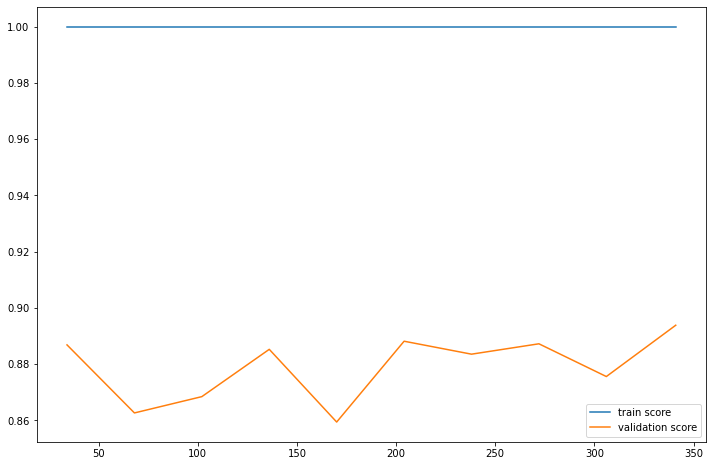

In [43]:
evaluation(model)

In [7]:
# 60 out of 67 cells were successively classified as negative, and 44 out of 47 cells were successively classified as positive.

In [60]:
model.feature_importances_

array([0.        , 0.00975593, 0.0225544 , 0.        , 0.03894114,
       0.        , 0.00292488, 0.        , 0.01648206, 0.        ,
       0.        , 0.        , 0.        , 0.01215823, 0.00147678,
       0.        , 0.        , 0.01648206, 0.        , 0.00760711,
       0.        , 0.00947174, 0.0149055 , 0.13591117, 0.        ,
       0.        , 0.00930117, 0.69283499, 0.        , 0.00919285])

<AxesSubplot:>

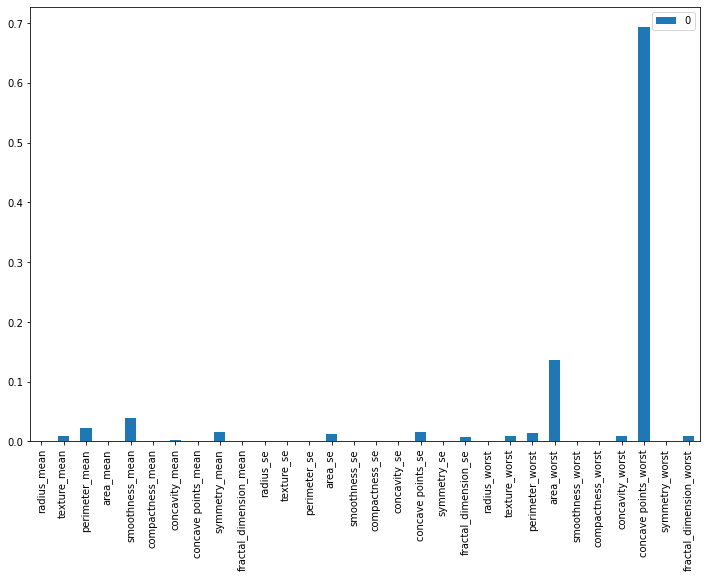

In [61]:
pd.DataFrame(model.feature_importances_, index=x_train.columns).plot.bar(figsize=(12,8))

#### I will make a feature selection since it seems we have one major parameter used in this model.
#### Then i will repeat the pre-modeling process with other models

#### We will create a pipeline with a threshold of importance for our parameters using:
- SelectFromModel
- SelectKBest (uses a statistical test)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

In [45]:
model = make_pipeline(SelectKBest(f_classif, k=10), RandomForestClassifier(random_state=0))

[[64  3]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        67
           1       0.94      0.96      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



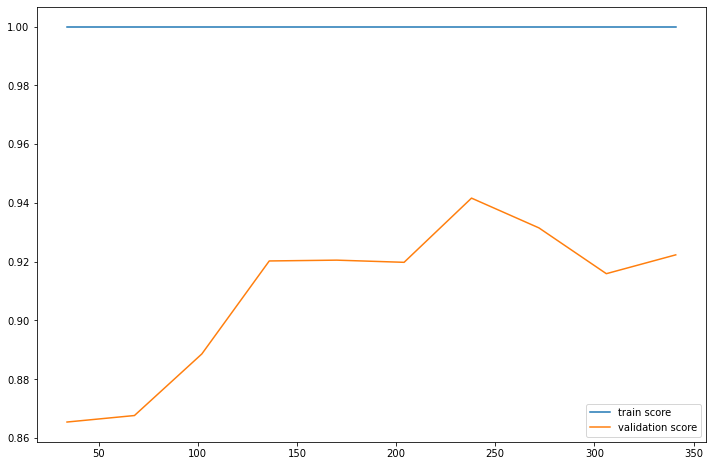

In [66]:
evaluation(model)

In [46]:
model = make_pipeline(SelectKBest(f_classif, k=2), RandomForestClassifier(random_state=0))


[[66  1]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



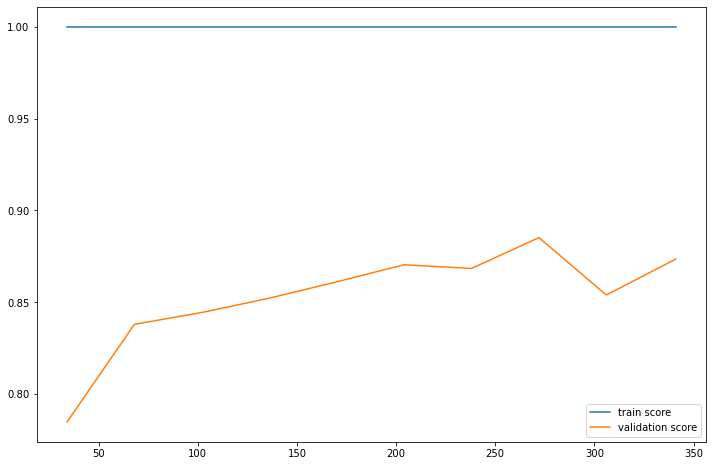

In [70]:
evaluation(model)

In [ ]:
# The model is less efficient

In [47]:
def evaluation(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, x_train, y_train,cv=4,  scoring='f1', train_sizes=np.linspace(0.1,1,10))
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

k = 1
[[63  4]
 [10 37]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        67
           1       0.90      0.79      0.84        47

    accuracy                           0.88       114
   macro avg       0.88      0.86      0.87       114
weighted avg       0.88      0.88      0.88       114

None
k = 2
[[66  1]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

None
k = 3
[[65  2]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95

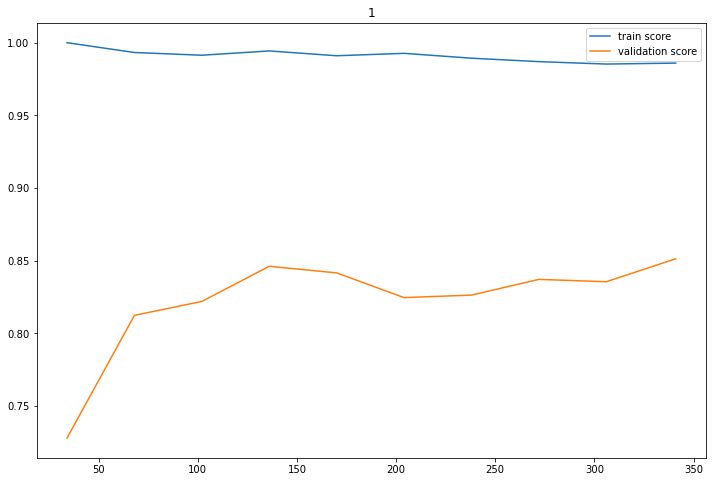

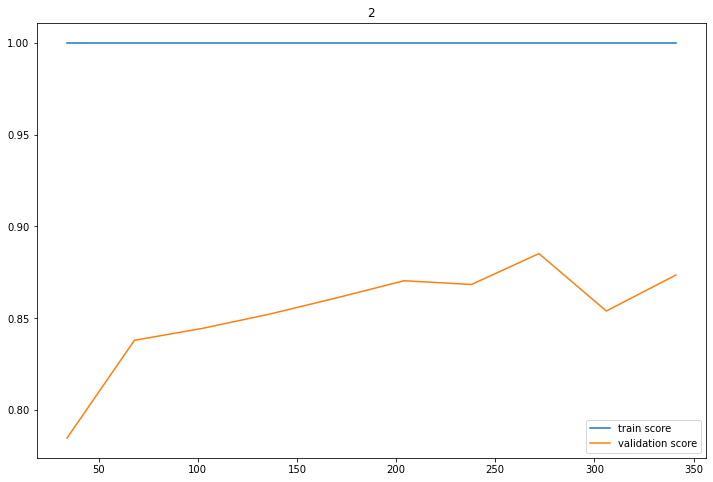

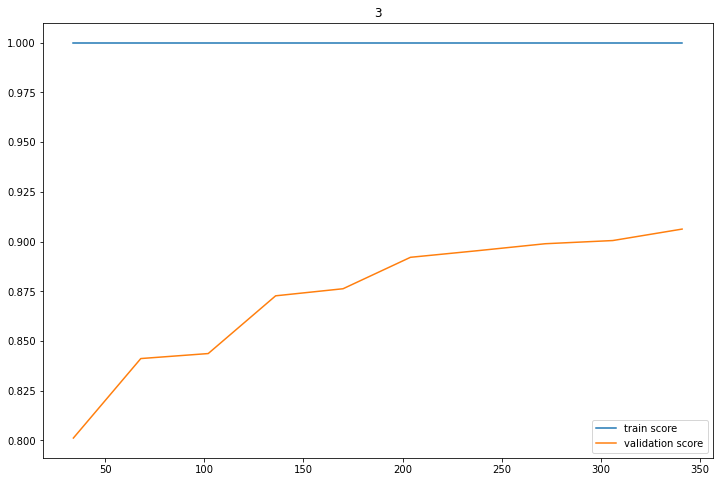

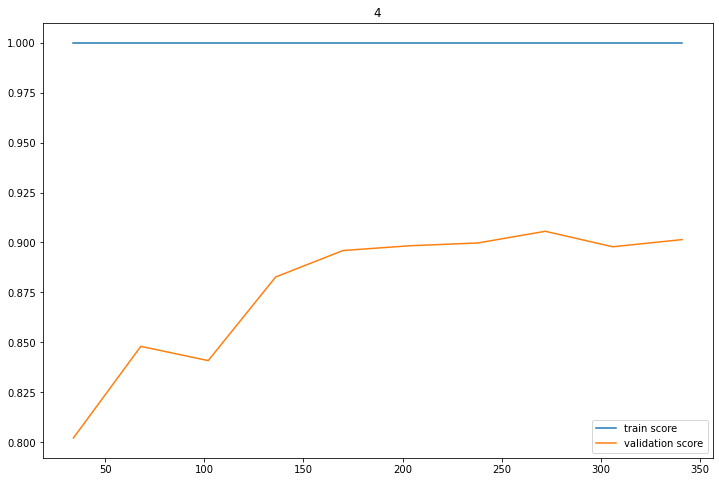

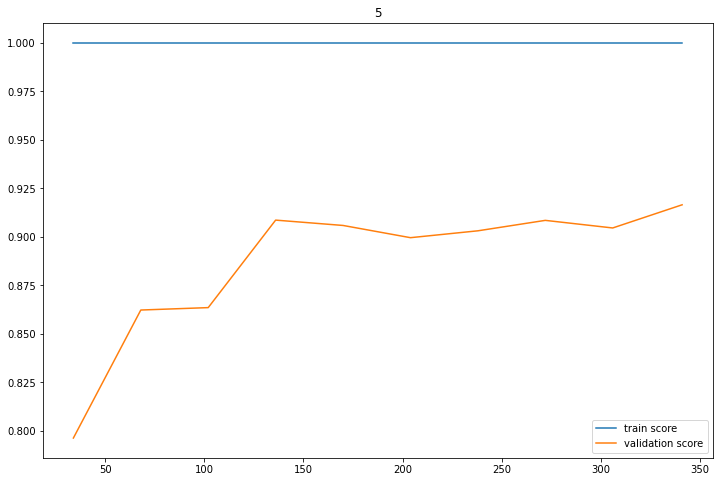

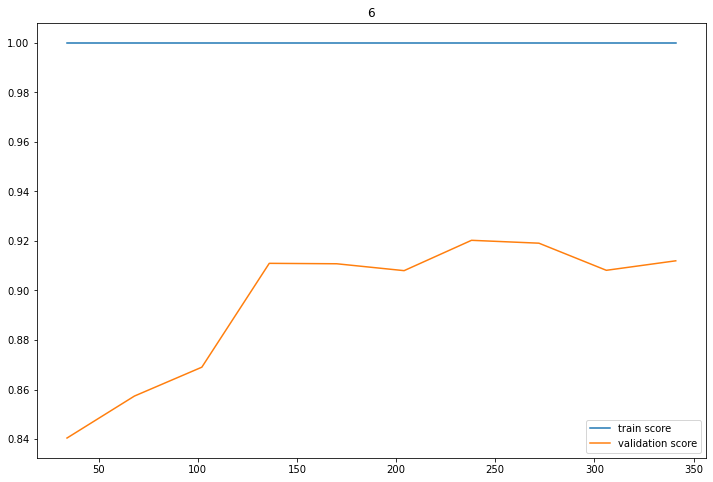

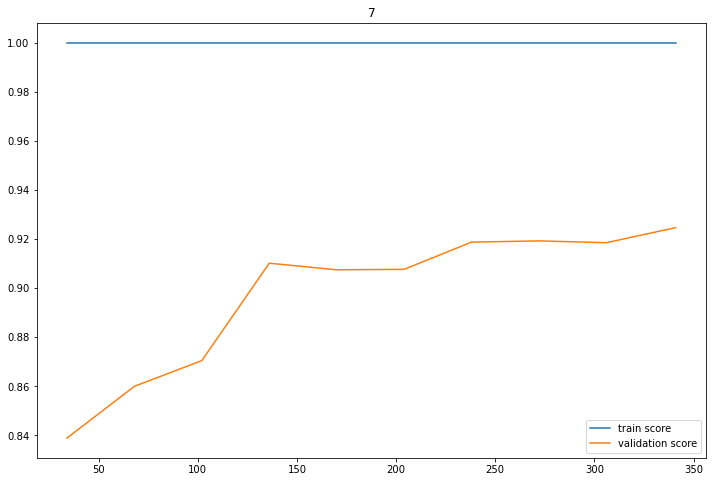

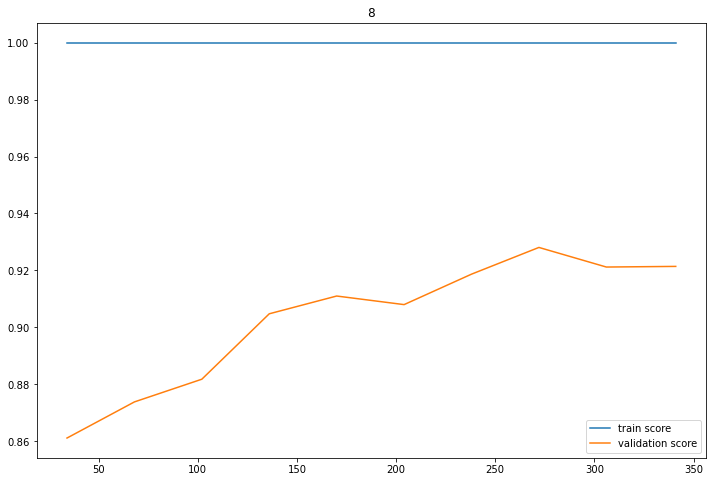

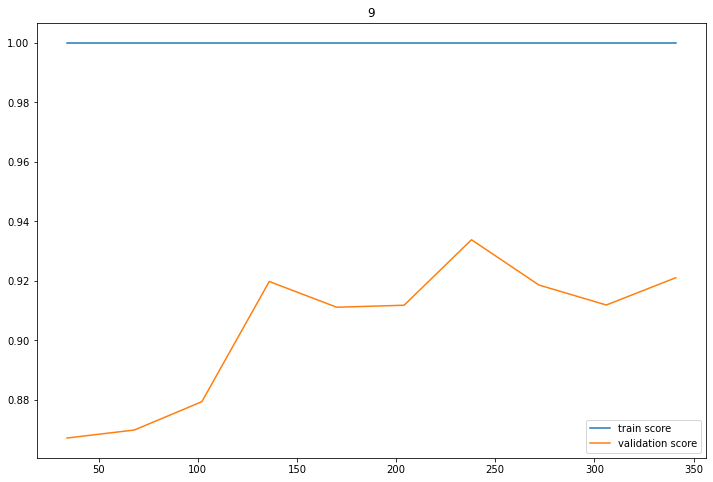

In [48]:
for i in range(1, 10): 
    model = make_pipeline(SelectKBest(f_classif, k=i), RandomForestClassifier(random_state=0))

    def evaluation_2(model):
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
    
        print('k =', i)
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))

        N, train_score, val_score = learning_curve(model, x_train, y_train,cv=4,  scoring='f1', train_sizes=np.linspace(0.1,1,10))

        plt.figure(figsize=(12, 8))
        plt.title(i)
        plt.plot(N, train_score.mean(axis=1), label='train score')
        plt.plot(N, val_score.mean(axis=1), label='validation score')
        plt.legend()
    
    
    print(evaluation_2(model))

In [8]:
# I will check the impact of normalized data

In [49]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [50]:
x_stdscl = StandardScaler().fit_transform(x_train)
x_minmax = MinMaxScaler().fit_transform(x_train)
x_robust = RobustScaler().fit_transform(x_train)

In [59]:
x_train.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
338        10.05         17.53           64.41      310.8          0.10070   
427        10.80         21.98           68.79      359.9          0.08801   
406        16.14         14.86          104.30      800.0          0.09495   
96         12.18         17.84           77.79      451.1          0.10450   
490        12.25         22.44           78.18      466.5          0.08192   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
338           0.07326         0.02511              0.01775         0.1890   
427           0.05743         0.03614              0.01404         0.2016   
406           0.08501         0.05500              0.04528         0.1735   
96            0.07057         0.02490              0.02941         0.1900   
490           0.05200         0.01714              0.01261         0.1544   

     fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
338                 0.06331     0.2619      2.0150         1.778    16.85   
427                 0.05977     0.3077      1.6210         2.240    20.20   
406                 0.05875     0.2387      0.6372         1.729    21.83   
96                  0.06635     0.3661      1.5110         2.410    24.44   
490                 0.05976     0.2239      1.1390         1.577    18.04   

     smoothness_se  compactness_se  concavity_se  concave points_se  \
338       0.007803         0.01449       0.01690           0.008043   
427       0.006543         0.02148       0.02991           0.010450   
406       0.003958         0.01246       0.01831           0.008747   
96        0.005433         0.01179       0.01131           0.015190   
490       0.005096         0.01205       0.00941           0.004551   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
338      0.02100              0.002778         11.16          26.84   
427      0.01844              0.002690         12.76          32.04   
406      0.01500              0.001621         17.71          19.58   
96       0.02220              0.003408         12.83          20.92   
490      0.01608              0.002399         14.17          31.99   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
338            71.98       384.0            0.1402            0.14020   
427            83.69       489.5            0.1303            0.16960   
406           115.90       947.9            0.1206            0.17220   
96             82.14       495.2            0.1140            0.09358   
490            92.74       622.9            0.1256            0.18040   

     concavity_worst  concave points_worst  symmetry_worst  \
338           0.1055               0.06499          0.2894   
427           0.1927               0.07485          0.2965   
406           0.2310               0.11290          0.2778   
96            0.0498               0.05882          0.2227   
490           0.1230               0.06335          0.3100   

     fractal_dimension_worst  
338                  0.07664  
427                  0.07662  
406                  0.07012  
96                   0.07376  
490                  0.08203

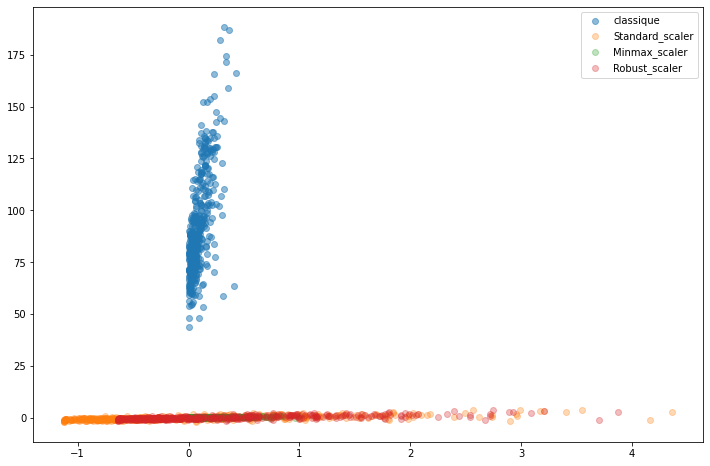

In [60]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['concavity_mean'], x_train['perimeter_mean'], alpha=0.5, label='classique' )
plt.scatter(x_stdscl[:, 6], x_stdscl[:, 2], alpha=0.3, label='Standard_scaler' )
plt.scatter(x_minmax[:, 6], x_minmax[:, 2], alpha=0.3, label='Minmax_scaler' )
plt.scatter(x_robust[:, 6], x_robust[:, 2], alpha=0.3, label='Robust_scaler' )
plt.legend()

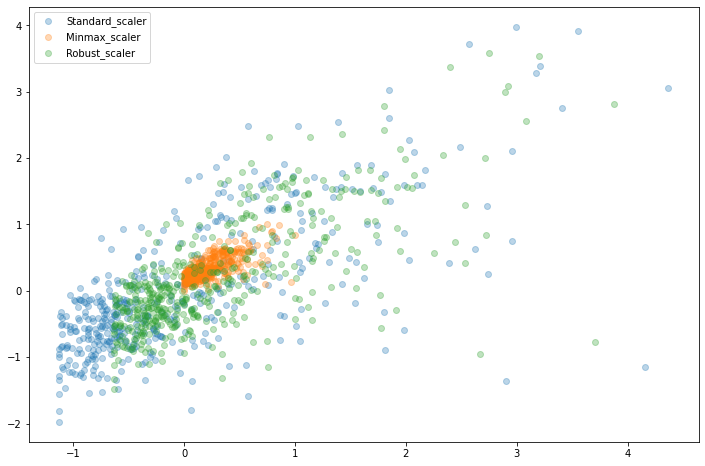

In [61]:
plt.figure(figsize=(12,8))
#plt.scatter(x_train['concavity_mean'], x_train['perimeter_mean'], alpha=0.5, label='classique' )
plt.scatter(x_stdscl[:, 6], x_stdscl[:, 2], alpha=0.3, label='Standard_scaler' )
plt.scatter(x_minmax[:, 6], x_minmax[:, 2], alpha=0.3, label='Minmax_scaler' )
plt.scatter(x_robust[:, 6], x_robust[:, 2], alpha=0.3, label='Robust_scaler' )
plt.legend()

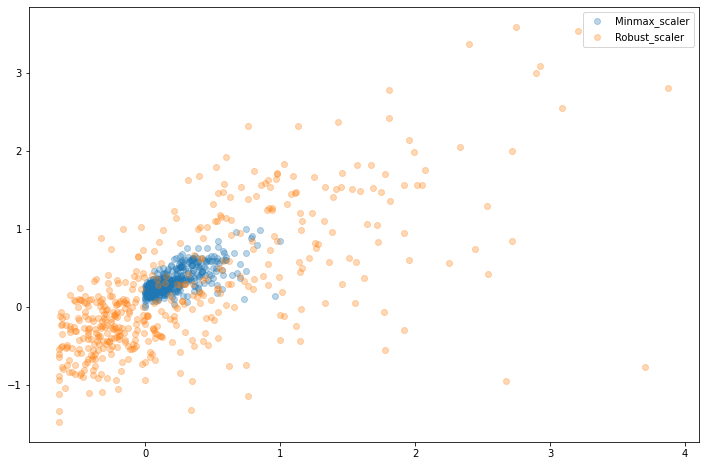

In [62]:
plt.figure(figsize=(12,8))
#plt.scatter(x_train['concavity_mean'], x_train['perimeter_mean'], alpha=0.5, label='classique' )
#plt.scatter(x_stdscl[:, 6], x_stdscl[:, 2], alpha=0.3, label='Standard_scaler' )
plt.scatter(x_minmax[:, 6], x_minmax[:, 2], alpha=0.3, label='Minmax_scaler' )
plt.scatter(x_robust[:, 6], x_robust[:, 2], alpha=0.3, label='Robust_scaler' )
plt.legend()

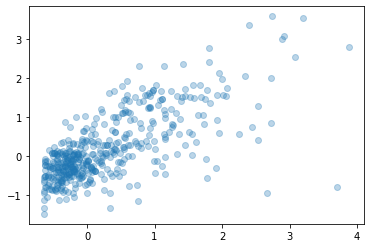

In [63]:
plt.scatter(x_robust[:, 6], x_robust[:, 2], alpha=0.3, label='Robust_scaler' )

In [9]:
# We will test the entire modeling process with Robust Scaler and compare it with our original dataset. 
# Robust Scaler will handle potential outliers, but the issue is that it may remove data from the dataset. 
# Therefore, the data must be removed at both the feature and target levels to ensure consistency.

In [64]:
pd.DataFrame(x_robust, columns=x_train.columns)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0      -0.800496     -0.221014       -0.755517  -0.673469         0.253867   
1      -0.614622      0.585145       -0.602102  -0.530321        -0.422933   
2       0.708798     -0.704710        0.641681   0.752770        -0.052800   
3      -0.272615     -0.164855       -0.286865  -0.264431         0.456533   
4      -0.255266      0.668478       -0.273205  -0.219534        -0.747733   
..           ...           ...             ...        ...              ...   
450     1.370508      0.222826        1.223117   1.633236        -0.357867   
451    -0.203222      0.958333       -0.070403  -0.192128         1.208533   
452    -0.952664     -0.077899       -0.916287  -0.767347         0.264533   
453    -0.882280     -0.096014       -0.884413  -0.739650        -1.410133   
454    -0.438662      0.938406       -0.401401  -0.403207        -0.177600   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           -0.301235       -0.370206            -0.293396       0.291233   
1           -0.551948       -0.253671            -0.362904       0.665676   
2           -0.115141       -0.054411             0.222389      -0.169391   
3           -0.343839       -0.372425            -0.074941       0.320951   
4           -0.637947       -0.454411            -0.389696      -0.736999   
..                ...             ...                  ...            ...   
450         -0.529617        0.211833             0.468759      -0.719168   
451          2.333228        1.765980             0.974614       0.707281   
452         -0.518213       -0.349181            -0.362529      -0.849926   
453         -1.090276       -0.635499            -0.625948      -0.413076   
454          0.155527        0.539356             0.143138      -1.200594   

     fractal_dimension_mean  radius_se  texture_se  perimeter_se   area_se  \
0                  0.223767  -0.221616    1.388368     -0.264837 -0.251594   
1                 -0.223767  -0.029381    0.772358      0.010737 -0.125984   
2                 -0.352718  -0.318993   -0.765791     -0.294065 -0.064867   
3                  0.608091   0.215740    0.600375      0.112138  0.032996   
4                 -0.225032  -0.381112    0.018762     -0.384730 -0.206974   
..                      ...        ...         ...           ...       ...   
450               -1.463970   0.057083   -0.467480      0.084104  0.494188   
451                2.640961  -0.071773    0.737961     -0.109156  0.014248   
452                1.017699   0.810913    0.187617      0.623322  0.259468   
453                0.370417   0.164533    5.875547      0.004772 -0.070116   
454                0.525917  -0.318573    2.778299     -0.170593 -0.247094   

     smoothness_se  compactness_se  concavity_se  concave points_se  \
0         0.479198       -0.308516     -0.344563          -0.396437   
1         0.058145        0.065881      0.180351          -0.047798   
2        -0.805681       -0.417247     -0.287674          -0.294467   
3        -0.312782       -0.453133     -0.570103           0.638760   
4        -0.425397       -0.439207     -0.646762          -0.902231   
..             ...             ...           ...                ...   
450       0.401671       -0.487949      0.031874           0.557648   
451       0.260652        2.780932      2.097640           0.512746   
452       0.156057       -0.603535     -0.079080          -0.610516   
453      -1.555890       -0.723835     -1.026427          -1.561414   
454       0.611863        0.512587      1.288683           0.273754   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0       0.287879             -0.130280     -0.684601       0.195678   
1      -0.035354             -0.169409     -0.387755       0.819928   
2      -0.469697             -0.644731      0.530612      -0.675870   
3       0.439394              0.149844     -0.374768      -0.515006  

In [51]:
x_robust = pd.DataFrame(x_robust, columns=x_train.columns)

In [52]:
data=pd.DataFrame(dt, columns=dt.columns)

In [53]:
from sklearn.model_selection import train_test_split
robust_train, robust_test = train_test_split(data, test_size=0.2, random_state=0)

In [54]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [55]:
robust_train

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
338         B       10.050         17.53           64.41      310.8   
427         B       10.800         21.98           68.79      359.9   
406         B       16.140         14.86          104.30      800.0   
96          B       12.180         17.84           77.79      451.1   
490         B       12.250         22.44           78.18      466.5   
..        ...          ...           ...             ...        ...   
277         M       18.810         19.98          120.90     1102.0   
9           M       12.460         24.04           83.97      475.9   
359         B        9.436         18.32           59.82      278.6   
192         B        9.720         18.22           60.73      288.1   
559         B       11.510         23.93           74.52      403.5   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
338          0.10070           0.07326         0.02511              0.01775   
427          0.08801           0.05743         0.03614              0.01404   
406          0.09495           0.08501         0.05500              0.04528   
96           0.10450           0.07057         0.02490              0.02941   
490          0.08192           0.05200         0.01714              0.01261   
..               ...               ...             ...                  ...   
277          0.08923           0.05884         0.08020              0.05843   
9            0.11860           0.23960         0.22730              0.08543   
359          0.10090           0.05956         0.02710              0.01406   
192          0.06950           0.02344         0.00000              0.00000   
559          0.09261           0.10210         0.11120              0.04105   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
338         0.1890                 0.06331     0.2619      2.0150   
427         0.2016                 0.05977     0.3077      1.6210   
406         0.1735                 0.05875     0.2387      0.6372   
96          0.1900                 0.06635     0.3661      1.5110   
490         0.1544                 0.05976     0.2239      1.1390   
..             ...                     ...        ...         ...   
277         0.1550                 0.04996     0.3283      0.8280   
9           0.2030                 0.08243     0.2976      1.5990   
359         0.1506                 0.06959     0.5079      1.2470   
192         0.1653                 0.06447     0.3539      4.8850   
559         0.1388                 0.06570     0.2388      2.9040   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
338         1.778    16.85       0.007803        0.014490       0.01690   
427         2.240    20.20       0.006543        0.021480       0.02991   
406         1.729    21.83       0.003958        0.012460       0.01831   
96          2.410    24.44       0.005433        0.011790       0.01131   
490         1.577    18.04       0.005096        0.012050       0.00941   
..            ...      ...            ...             ...           ...   
277         2.363    36.74       0.007571        0.011140       0.02623   
9           2.039    23.94       0.007149        0.072170       0.07743   
359         3.267    30.48       0.006836        0.008982       0.02348   
192         2.230    21.69       0.001713        0.006736       0.00000   
559         1.936    16.97       0.008200        0.029820       0.05738   

     concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
338           0.008043      0.02100              0.002778        11.160   
427           0.010450      0.01844              0.002690        12.760   
406           0.008747      0.01500              0.001621        17.710   
96            0.015190      0.02220              0.003408        12.830   
490           0.004551      0.01608              0.002399        14.170   
..                 ...

In [70]:
x_robtrain, y_robtrain = preprocessing(robust_train)
x_robtest, y_robtest = preprocessing(robust_test)

0    290
1    165
Name: diagnosis, dtype: int64
0    67
1    47
Name: diagnosis, dtype: int64


k = 1
[[63  4]
 [10 37]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        67
           1       0.90      0.79      0.84        47

    accuracy                           0.88       114
   macro avg       0.88      0.86      0.87       114
weighted avg       0.88      0.88      0.88       114

None
k = 2
[[66  1]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

None
k = 3
[[65  2]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95

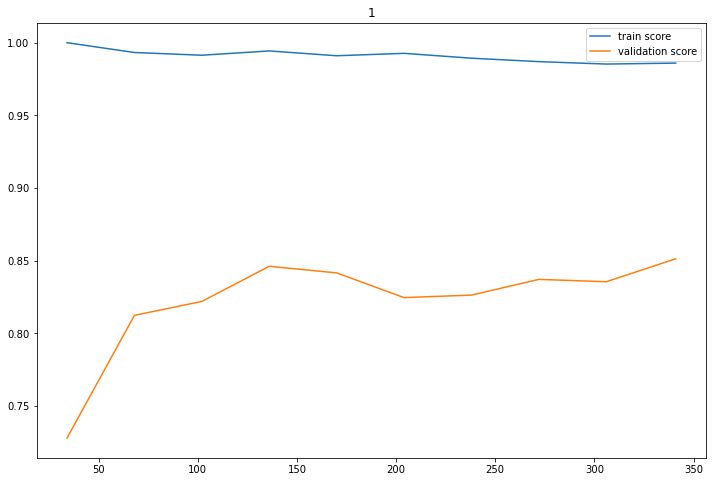

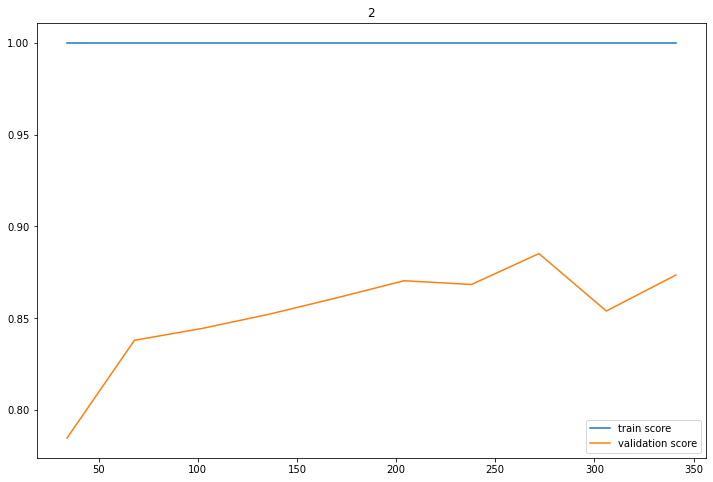

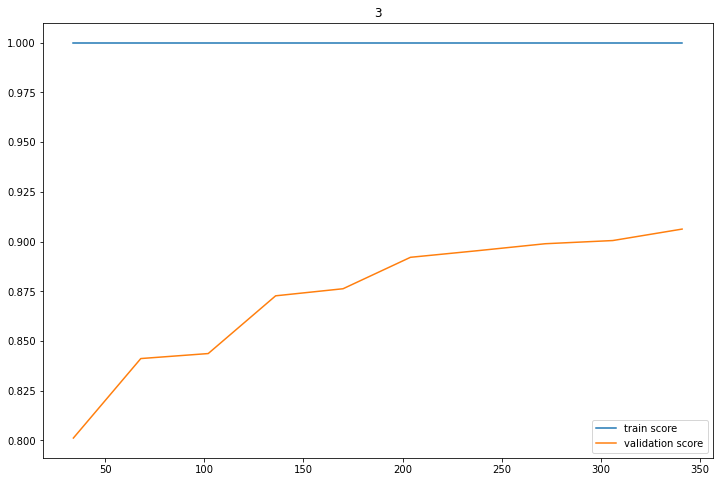

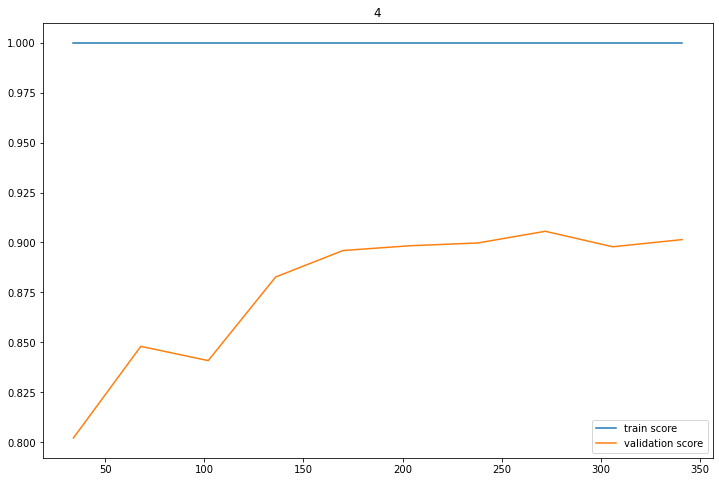

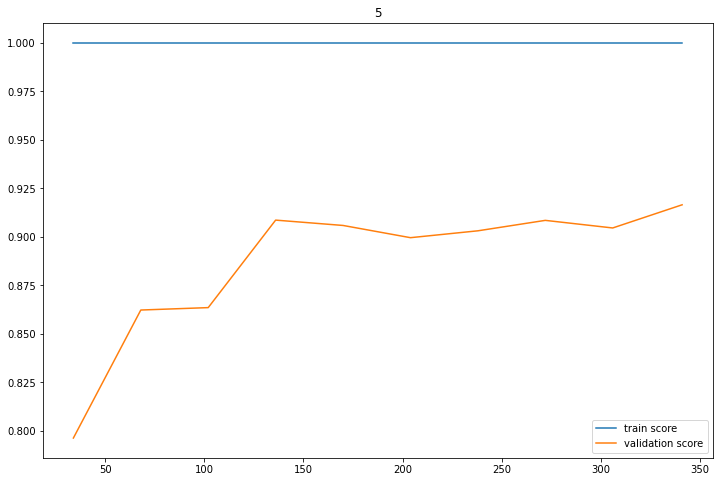

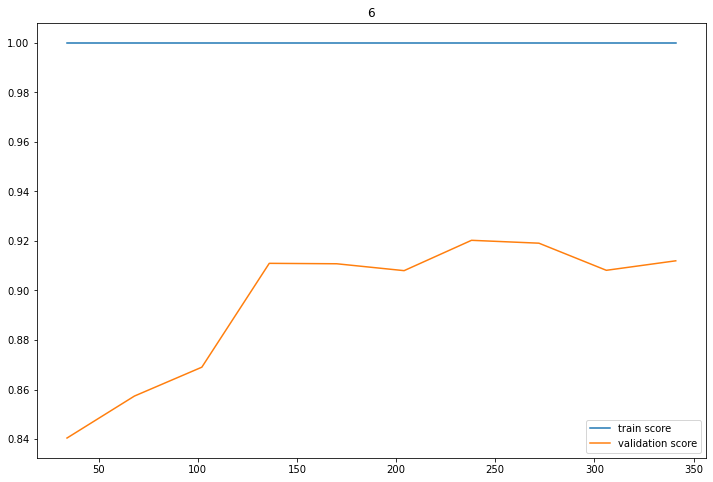

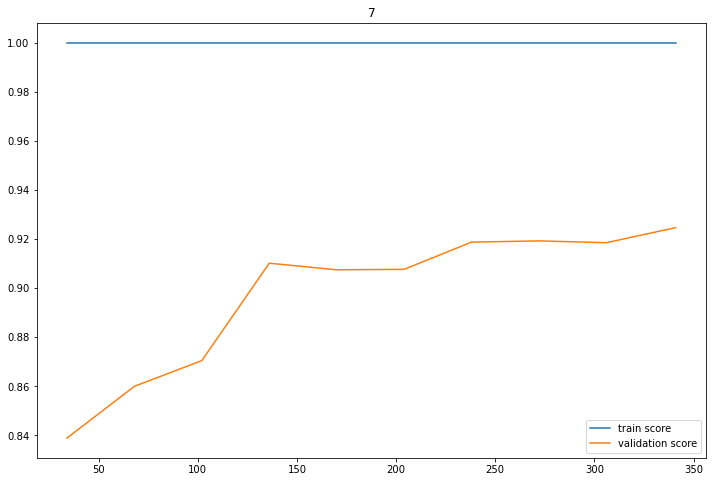

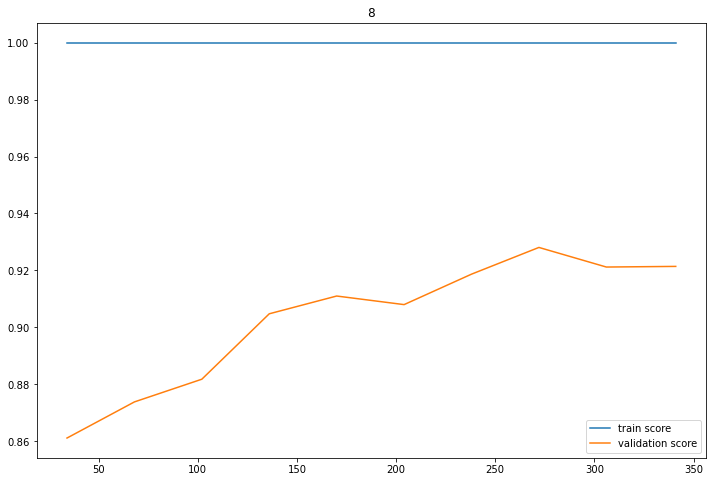

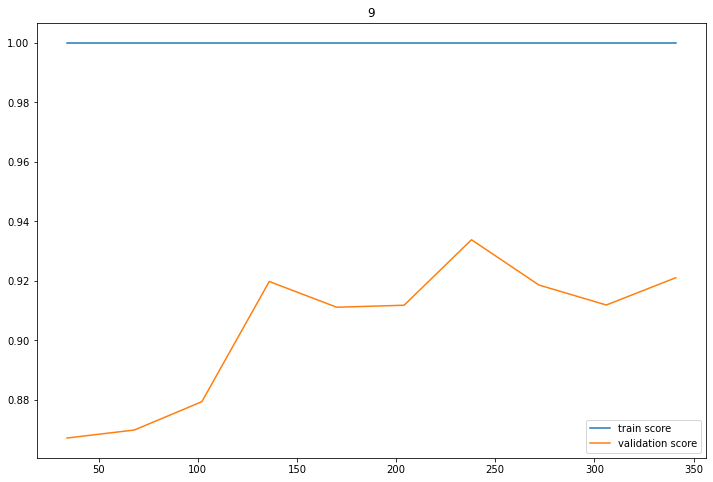

In [71]:
for i in range(1, 10): 
    model = make_pipeline(SelectKBest(f_classif, k=i), RandomForestClassifier(random_state=0))

    def evaluation_2(model):
        model.fit(x_robtrain, y_robtrain)
        y_pred = model.predict(x_robtest)
    
        print('k =', i)
        print(confusion_matrix(y_robtest, y_pred))
        print(classification_report(y_robtest, y_pred))

        N, train_score, val_score = learning_curve(model, x_robtrain, y_robtrain,cv=4,  scoring='f1', 
                                                   train_sizes=np.linspace(0.1,1,10))

        plt.figure(figsize=(12, 8))
        plt.title(i)
        plt.plot(N, train_score.mean(axis=1), label='train score')
        plt.plot(N, val_score.mean(axis=1), label='validation score')
        plt.legend()
    
    
    print(evaluation_2(model))

In [71]:
model.fit(x_robtrain, y_robtrain)

Pipeline(steps=[('selectkbest', SelectKBest(k=1)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=0))])

In [10]:
# By comparing our models with regular or normalized data, we observe that it does not make much difference 
# when the optimal k is used. However, when the data has a low k value, 
# poor results are observed when the data is normalized. As a precaution, we will keep the regular data.

# Next, we will apply polynomial feature transformation to further determine the importance of our features.

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[66  1]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, U

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, U

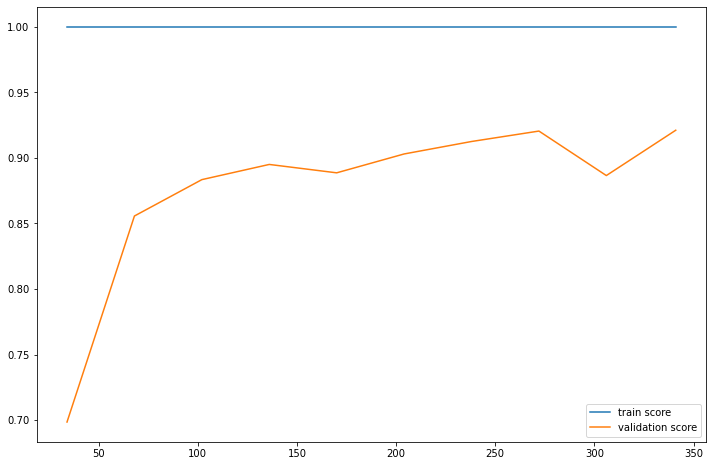

In [93]:
model = make_pipeline(PolynomialFeatures(4), SelectKBest(f_classif, k=3), RandomForestClassifier(random_state=0))
evaluation(model)
    

In [11]:
# It doesn't improve our model

#### I will use GridSearchCV to evaluate which parameters are the more useful --> at the end of the optimisation process

# 4. Modeling

In [105]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [58]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from statsmodels.api import Logit 

In [59]:
preprocessor = make_pipeline(SelectKBest(f_classif, k=7))
#preprocessor_pca = make_pipeline(SelectKBest())

In [60]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
#pca = make_pipeline(preprocessor_pca, StandardScaler(), PCA(random_state=0))
linear = make_pipeline(preprocessor, StandardScaler(), LinearSVC(random_state=0))
svm = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
xgdb = make_pipeline(preprocessor, StandardScaler(), XGBClassifier())

In [12]:
# Decision trees (AdaBoost, RandomForest) do not require a normalized dataset.
# However, SVC (Support Vector Classifier) and KNN (K-Nearest Neighbors) do require a normalized dataset.

In [62]:
dict_of_models = {'RandomForest': RandomForest, 
                 'AdaBoost': AdaBoost, 
                 #'pca': pca, 
                 'linear': linear, 
                 'svm': svm, 
                 'KNN': KNN, 
                 'xgdb': xgdb}

RandomForest
[[65  2]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

AdaBoost
[[67  0]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        67
           1       1.00      0.91      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

linear
[[65  2]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.9

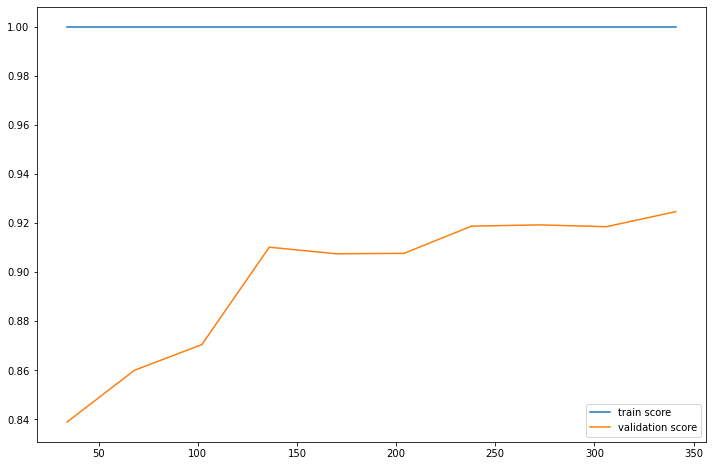

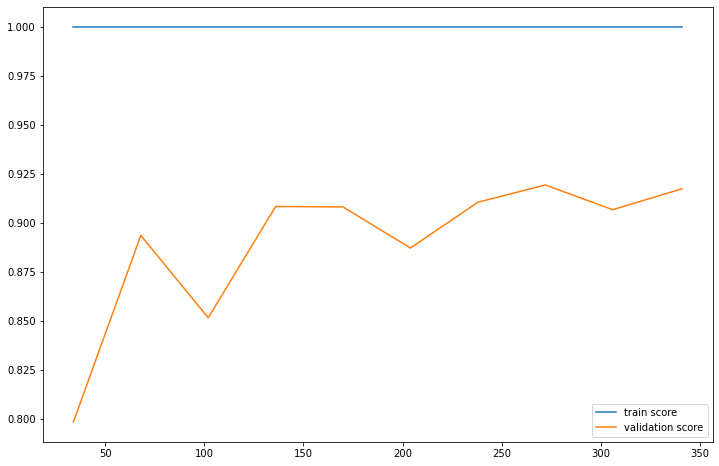

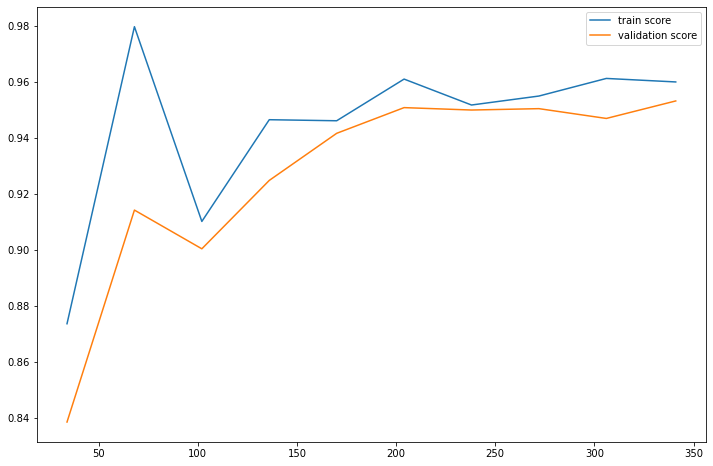

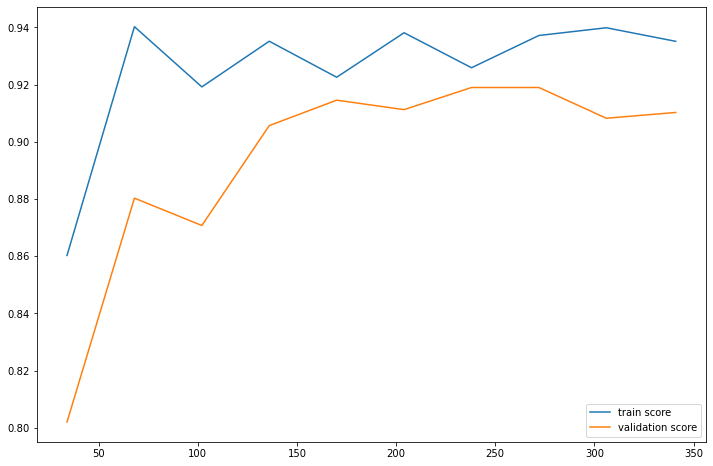

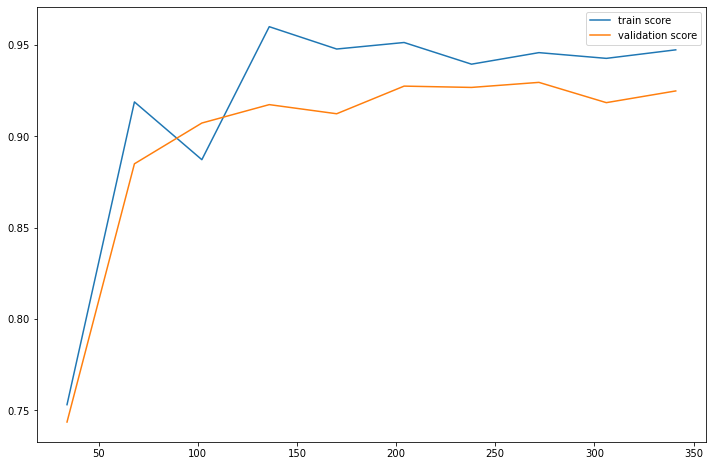

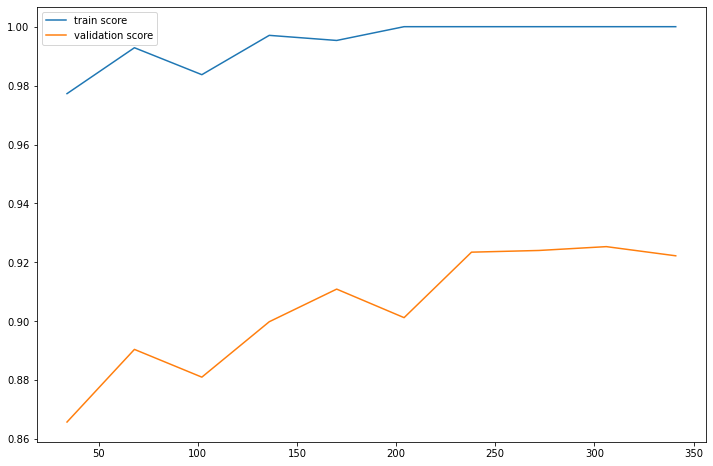

In [76]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [13]:
# We will focus on recall because it refers to false negatives. 
# If we allow positive cells to go undetected, it is not acceptable. We will also work on the linear model. 
# The goal is to minimize the difference between the train score and the validation score, 
# as this indicates that the machine can replicate its training performance well on the test set.

In [63]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), 
                             SelectKBest(f_classif, k=7))
#preprocessor_pca = make_pipeline(SelectKBest())

In [64]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
#pca = make_pipeline(preprocessor_pca, StandardScaler(), PCA(random_state=0))
linear = make_pipeline(preprocessor, StandardScaler(), LinearSVC(random_state=0))
svm = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())
xgdb = make_pipeline(preprocessor, StandardScaler(), XGBClassifier())

RandomForest
[[65  2]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

AdaBoost
[[67  0]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        67
           1       1.00      0.91      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

linear
[[65  2]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.9

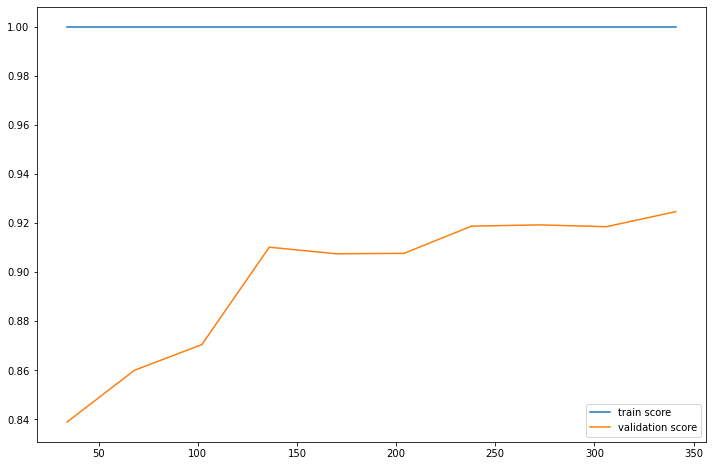

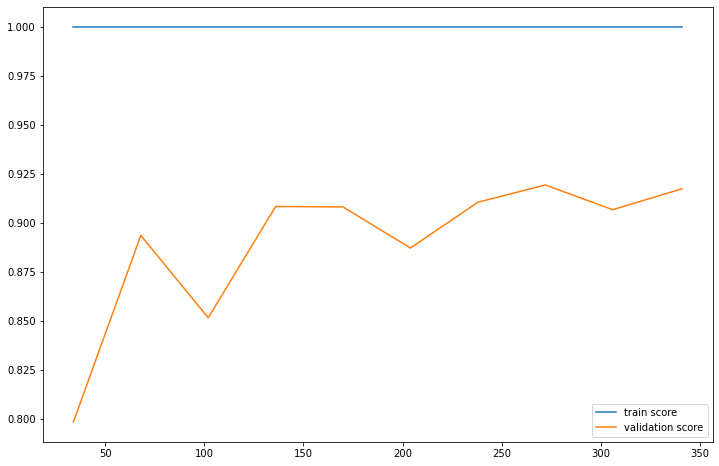

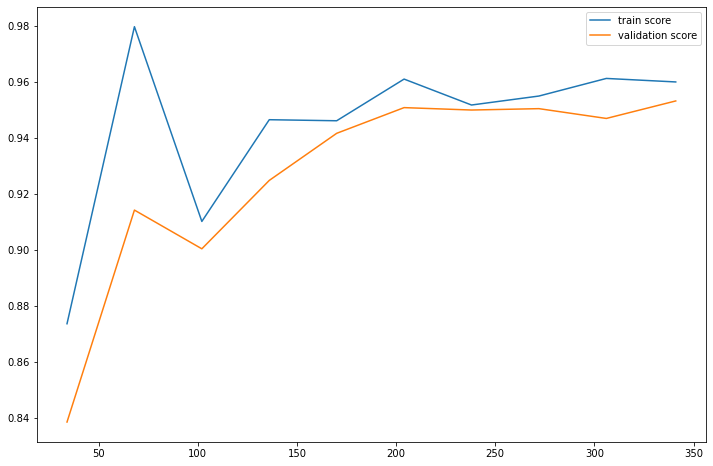

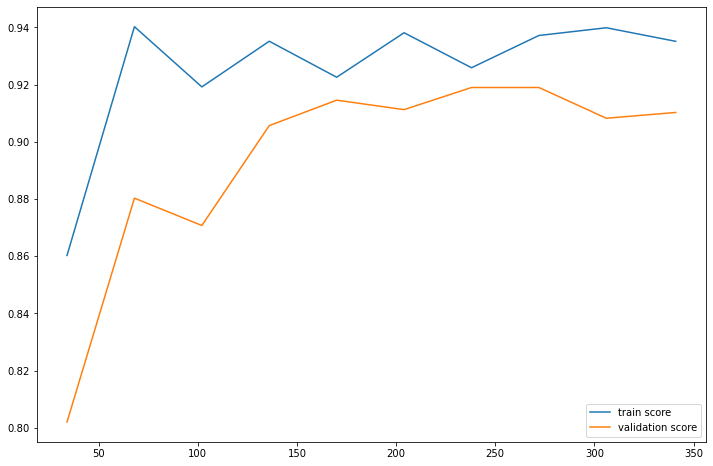

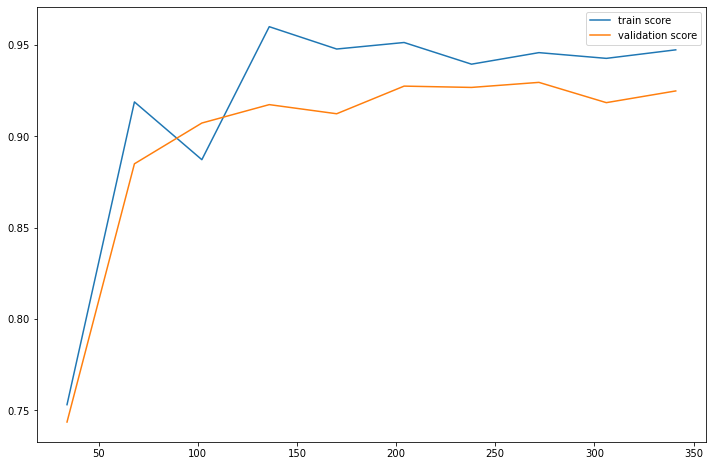

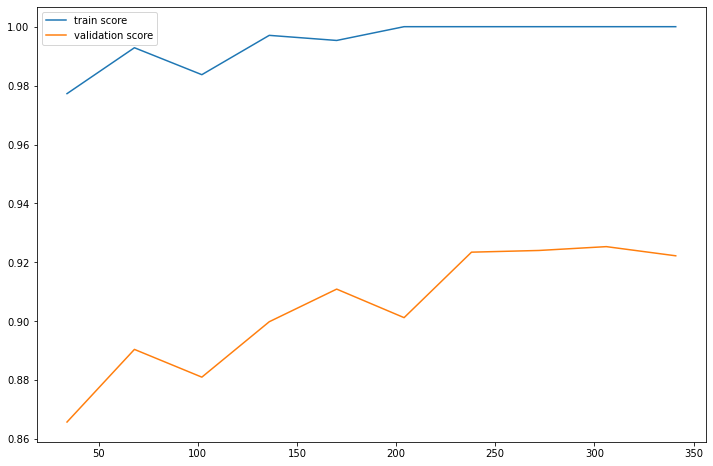

In [79]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

#### Optimisation

In [65]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import set_config

In [66]:
set_config(display='text')

In [67]:
linear.get_params()

{'memory': None,
 'steps': [('pipeline',
   Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                   ('selectkbest', SelectKBest(k=7))])),
  ('standardscaler', StandardScaler()),
  ('linearsvc', LinearSVC(random_state=0))],
 'verbose': False,
 'pipeline': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                 ('selectkbest', SelectKBest(k=7))]),
 'standardscaler': StandardScaler(),
 'linearsvc': LinearSVC(random_state=0),
 'pipeline__memory': None,
 'pipeline__steps': [('polynomialfeatures',
   PolynomialFeatures(include_bias=False)),
  ('selectkbest', SelectKBest(k=7))],
 'pipeline__verbose': False,
 'pipeline__polynomialfeatures': PolynomialFeatures(include_bias=False),
 'pipeline__selectkbest': SelectKBest(k=7),
 'pipeline__polynomialfeatures__degree': 2,
 'pipeline__polynomialfeatures__include_bias': False,
 'pipeline__polynomialfeatures__interaction_only': False,
 'pipeline__polynomialfeatures__ord

In [70]:
preprocessor.get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures(include_bias=False)),
  ('selectkbest', SelectKBest(k=7))],
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(include_bias=False),
 'selectkbest': SelectKBest(k=7),
 'polynomialfeatures__degree': 2,
 'polynomialfeatures__include_bias': False,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'selectkbest__k': 7,
 'selectkbest__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

In [71]:
hyper_params = {'svc__kernel': ['linear', 'poly', 'sigmoid', 'precomputed'], 
               'pipeline__polynomialfeatures__degree': [2, 3, 4]}

In [72]:
grid=GridSearchCV(svm, hyper_params, scoring='recall', cv=4)
grid.fit(x_train, y_train)
print(grid.best_params_)
y_pred = grid.predict(x_test)
print(classification_report(y_test, y_pred))

{'pipeline__polynomialfeatures__degree': 3, 'svc__kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 215, in fit
    raise ValueError(
ValueError: Precomputed matrix must be a sq

In [74]:
grid.best_params_

{'pipeline__polynomialfeatures__degree': 3, 'svc__kernel': 'linear'}

[[67  0]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



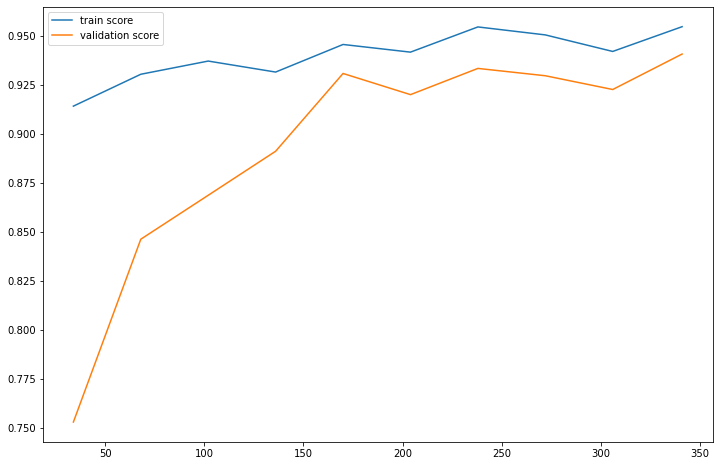

In [75]:
evaluation(grid.best_estimator_)

In [76]:
hyper_params = {'svc__kernel': ['linear', 'poly', 'sigmoid', 'precomputed'], 
               'pipeline__polynomialfeatures__degree': [1, 2, 3, 4], 
                'pipeline__selectkbest__k': range(1, 100)}

In [77]:
grid=RandomizedSearchCV(svm, hyper_params, scoring='recall', cv=4)
grid.fit(x_train, y_train)
print(grid.best_params_)
y_pred = grid.predict(x_test)
print(classification_report(y_test, y_pred))

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 215, in fit
    raise ValueError(
ValueError: Precomputed matrix must be a sq

{'svc__kernel': 'sigmoid', 'pipeline__selectkbest__k': 59, 'pipeline__polynomialfeatures__degree': 4}
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



[[65  2]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



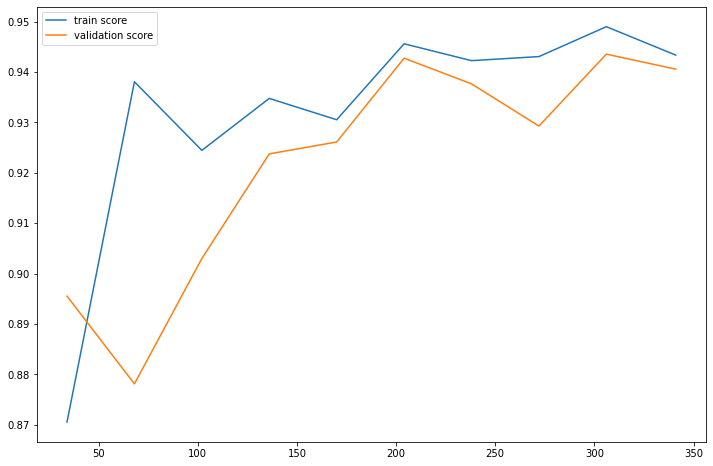

In [78]:
evaluation(grid.best_estimator_)

In [79]:
svm.get_params()

{'memory': None,
 'steps': [('pipeline',
   Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                   ('selectkbest', SelectKBest(k=7))])),
  ('standardscaler', StandardScaler()),
  ('svc', SVC(random_state=0))],
 'verbose': False,
 'pipeline': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                 ('selectkbest', SelectKBest(k=7))]),
 'standardscaler': StandardScaler(),
 'svc': SVC(random_state=0),
 'pipeline__memory': None,
 'pipeline__steps': [('polynomialfeatures',
   PolynomialFeatures(include_bias=False)),
  ('selectkbest', SelectKBest(k=7))],
 'pipeline__verbose': False,
 'pipeline__polynomialfeatures': PolynomialFeatures(include_bias=False),
 'pipeline__selectkbest': SelectKBest(k=7),
 'pipeline__polynomialfeatures__degree': 2,
 'pipeline__polynomialfeatures__include_bias': False,
 'pipeline__polynomialfeatures__interaction_only': False,
 'pipeline__polynomialfeatures__order': 'C',
 'pipeline__se

In [80]:
hyper_params = {'svc__gamma': [1e-3, 1e-4], 
               'svc__C': [1, 10, 100, 1000], 
               'pipeline__polynomialfeatures__degree': [2, 3, 4], 
               'pipeline__selectkbest__k': range(4, 100)}

[[65  2]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



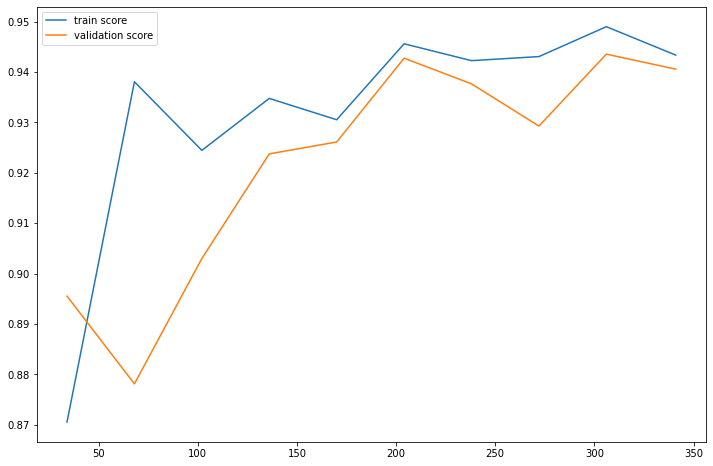

In [81]:
evaluation(grid.best_estimator_)

In [82]:
grid=RandomizedSearchCV(svm, hyper_params, scoring='recall', cv=4)
grid.fit(x_train, y_train)
print(grid.best_params_)
y_pred = grid.predict(x_test)
print(classification_report(y_test, y_pred))

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 71, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        67
           1       1.00      0.98      0.99        47

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



[[67  0]
 [ 1 46]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        67
           1       1.00      0.98      0.99        47

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



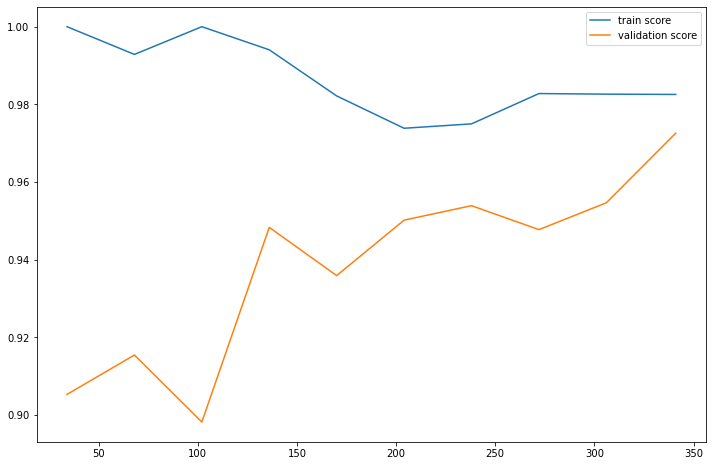

In [83]:
evaluation(grid.best_estimator_)

In [167]:
hyper_params = {'svc__gamma': [0.0001], 
                'svc__C': [100], 
                'pipeline__selectkbest__k': [80], 
                'pipeline__polynomialfeatures__degree': [3]}

In [170]:
grid=GridSearchCV(svm, hyper_params, scoring='recall', cv=4)
grid.fit(x_train, y_train)
print(grid.best_params_)
y_pred=grid.predict(x_test)
print(classification_report(y_test, y_pred))

{'pipeline__polynomialfeatures__degree': 3, 'pipeline__selectkbest__k': 80, 'svc__C': 100, 'svc__gamma': 0.0001}
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        67
           1       0.93      0.89      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



[[64  3]
 [ 5 42]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        67
           1       0.93      0.89      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



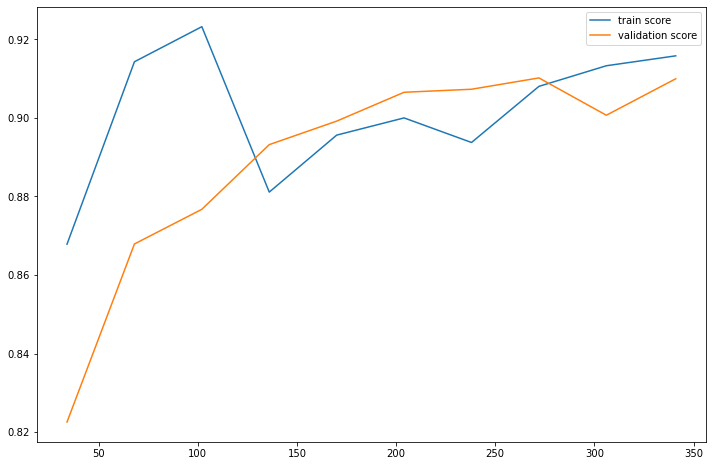

In [171]:
evaluation(grid)

# Precision Recall Curve

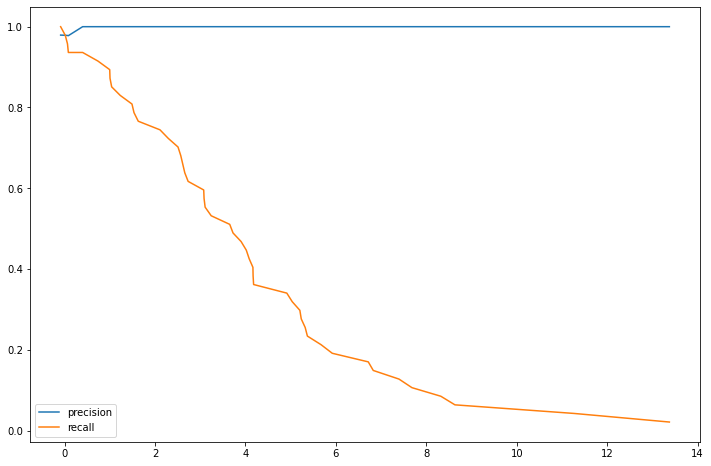

In [123]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(x_test))

plt.figure(figsize=(12,8))
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

def model_final(model, x, threshold=0):
    return model.decision_function(x) > threshold

y_pred = model_final(grid.best_estimator_, x_test, threshold=-1)

f1_score(y_test, y_pred)

recall_score(y_test, y_pred)

In [121]:
from sklearn.metrics import precision_recall_curve

In [173]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(x_test))

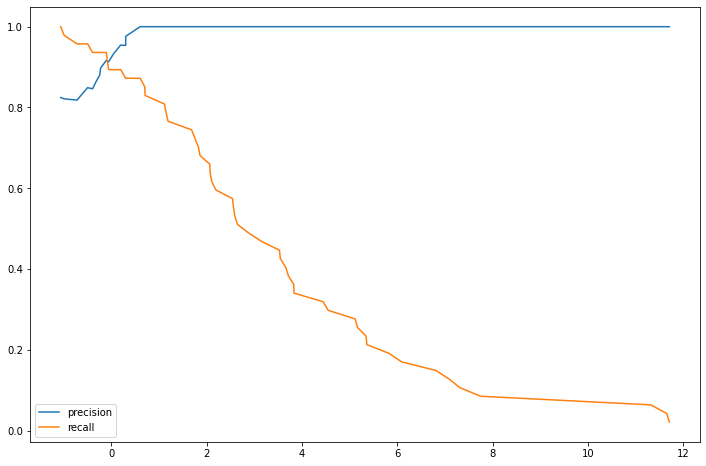

In [174]:
plt.figure(figsize=(12,8))
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [177]:
def model_final(model, x, threshold=0):
    return model.decision_function(x) > threshold

In [190]:
y_pred = model_final(grid.best_estimator_, x_test, threshold=-1)

In [191]:
f1_score(y_test, y_pred)

0.8932038834951456

In [122]:
from sklearn.metrics import recall_score

In [193]:
recall_score(y_test, y_pred)

0.9787234042553191

In [195]:
x_test

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
512        13.40         20.52           88.64      556.7          0.11060   
457        13.21         25.25           84.10      537.9          0.08791   
439        14.02         15.66           89.59      606.5          0.07966   
298        14.26         18.17           91.22      633.1          0.06576   
37         13.03         18.42           82.61      523.8          0.08983   
..           ...           ...             ...        ...              ...   
213        17.42         25.56          114.50      948.0          0.10060   
519        12.75         16.70           82.51      493.8          0.11250   
432        20.18         19.54          133.80     1250.0          0.11330   
516        18.31         20.58          120.80     1052.0          0.10680   
500        15.04         16.74           98.73      689.4          0.09883   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
512           0.14690         0.14450              0.08172         0.2116   
457           0.05205         0.02772              0.02068         0.1619   
439           0.05581         0.02087              0.02652         0.1589   
298           0.05220         0.02475              0.01374         0.1635   
37            0.03766         0.02562              0.02923         0.1467   
..                ...             ...                  ...            ...   
213           0.11460         0.16820              0.06597         0.1308   
519           0.11170         0.03880              0.02995         0.2120   
432           0.14890         0.21330              0.12590         0.1724   
516           0.12480         0.15690              0.09451         0.1860   
500           0.13640         0.07721              0.06142         0.1668   

     fractal_dimension_mean  
512                 0.07325  
457                 0.05584  
439                 0.05586  
298                 0.05586  
37                  0.05863  
..                      ...  
213                 0.05866  
519                 0.06623  
432                 0.06053  
516                 0.05941  
500                 0.06869  

[114 rows x 10 columns]

In [196]:
y_test

512    1
457    0
439    0
298    0
37     0
      ..
213    1
519    0
432    1
516    1
500    0
Name: diagnosis, Length: 114, dtype: int64

In [14]:
# I will create a DataFrame named x_essai with the mean values to see how these data points are classified 
# according to our model

In [95]:
x_test.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   114.000000    114.000000      114.000000   114.000000   
mean     14.186333     19.835526       92.570702   659.159649   
std       3.493307      4.807878       24.340678   327.230961   
min       7.729000     10.910000       47.980000   178.800000   
25%      11.817500     16.710000       75.330000   428.225000   
50%      13.615000     19.390000       89.115000   572.250000   
75%      16.115000     22.555000      106.100000   804.600000   
max      22.270000     39.280000      152.800000  1509.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       114.000000        114.000000      114.000000           114.000000   
mean          0.096149          0.108421        0.094047             0.049834   
std           0.015137          0.061294        0.087125             0.039772   
min           0.065760          0.033980        0.000000             0.000000   
25%           0.085098          0.060132        0.025917             0.018122   
50%           0.094320          0.096425        0.068445             0.036050   
75%           0.104400          0.136925        0.143800             0.070582   
max           0.163400          0.345400        0.426400             0.182300   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     114.000000              114.000000  114.000000  114.000000   
mean        0.182051                0.063315    0.415743    1.244683   
std         0.027583                0.007964    0.248022    0.590420   
min         0.120300                0.050240    0.118600    0.362100   
25%         0.163325                0.057340    0.235325    0.844775   
50%         0.179000                0.061505    0.367250    1.084000   
75%         0.196425                0.067240    0.525650    1.478750   
max         0.290600                0.095020    1.370000    3.647000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    114.000000  114.000000     114.000000      114.000000    114.000000   
mean       3.028951   40.542474       0.007191        0.027134      0.033574   
std        1.957364   35.340500       0.003577        0.019411      0.026253   
min        0.848400    6.802000       0.002826        0.003746      0.000000   
25%        1.660250   18.702500       0.005237        0.013253      0.014165   
50%        2.584500   28.415000       0.006450        0.021200      0.028305   
75%        3.563000   48.065000       0.008113        0.036913      0.046525   
max       11.070000  176.500000       0.031130        0.093680      0.143800   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         114.000000   114.000000            114.000000    114.000000   
mean            0.012394     0.020610              0.004133     16.321447   
std             0.007155     0.008576              0.002773      4.617844   
min             0.000000     0.010130              0.001217      8.964000   
25%             0.007603     0.015282              0.002621     12.942500   
50%             0.011420     0.018895              0.003463     15.385000   
75%             0.015723     0.024325              0.004838     19.137500   
max             0.040900     0.078950              0.021930     28.400000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     114.000000       114.000000   114.000000        114.000000   
mean       26.229912       108.178421   878.161404          0.132007   
std         6.322216        32.646277   497.905888          0.023738   
min        14.100000        57.170000   242.200000          0.084090   
25%        21.557500        83.822500   517.050000          0.117875   
50%        26.440000       102.300000   724.500000          0.128800   
75%        31.160000       128.250000  1143.500000          0.148100   
max        44.870000       206.800000  2384.000000 

In [96]:
x_test.shape

(114, 30)

In [89]:
x_essai = np.array([14.18, 19.83, 92.57, 659.159649, 0.096149, 0.108421, 0.094047, 0.049834, 0.182051, 0.063315])

In [90]:
x_essai

array([1.41800000e+01, 1.98300000e+01, 9.25700000e+01, 6.59159649e+02,
       9.61490000e-02, 1.08421000e-01, 9.40470000e-02, 4.98340000e-02,
       1.82051000e-01, 6.33150000e-02])

In [91]:
pd.DataFrame(data=x_essai)#, columns=x_train.columns)

0
0   14.180000
1   19.830000
2   92.570000
3  659.159649
4    0.096149
5    0.108421
6    0.094047
7    0.049834
8    0.182051
9    0.063315

In [97]:
x_essai = np.array([[14.18, 19.83, 92.57, 659.159649, 0.096149, 0.108421, 0.094047, 0.049834, 0.182051, 0.063315, 
                     0.415743, 1.244683, 3.028951, 40.542474, 0.007191, 0.027134, 0.033574, 0.012394, 0.020610, 
                     0.004133, 16.321447, 26.229912, 108.178421, 878.161404, 0.132007, 0.263857, 0.290936, 0.115239, 
                     0.288717, 0.085759]])


In [98]:
x_essai

array([[1.41800000e+01, 1.98300000e+01, 9.25700000e+01, 6.59159649e+02,
        9.61490000e-02, 1.08421000e-01, 9.40470000e-02, 4.98340000e-02,
        1.82051000e-01, 6.33150000e-02, 4.15743000e-01, 1.24468300e+00,
        3.02895100e+00, 4.05424740e+01, 7.19100000e-03, 2.71340000e-02,
        3.35740000e-02, 1.23940000e-02, 2.06100000e-02, 4.13300000e-03,
        1.63214470e+01, 2.62299120e+01, 1.08178421e+02, 8.78161404e+02,
        1.32007000e-01, 2.63857000e-01, 2.90936000e-01, 1.15239000e-01,
        2.88717000e-01, 8.57590000e-02]])

In [99]:
pd.DataFrame(data=x_essai, columns=x_train.columns)

radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean  \
0        14.18         19.83           92.57  659.159649         0.096149   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.108421        0.094047             0.049834       0.182051   

   fractal_dimension_mean  radius_se  texture_se  perimeter_se    area_se  \
0                0.063315   0.415743    1.244683      3.028951  40.542474   

   smoothness_se  compactness_se  concavity_se  concave points_se  \
0       0.007191        0.027134      0.033574           0.012394   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.02061              0.004133     16.321447      26.229912   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0       108.178421  878.161404          0.132007           0.263857   

   concavity_worst  concave points_worst  symmetry_worst  \
0         0.290936              0.115239        0.288717   

   fractal_dimension_worst  
0                 0.085759

In [100]:
x_essai=pd.DataFrame(data=x_essai, columns=x_train.columns)

In [219]:
y_pred = model_final(grid.best_estimator_, x_essai, threshold=-1)

In [221]:
y_pred

array([ True])

In [222]:
grid.best_estimator_

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=3,
                                                     include_bias=False)),
                                 ('selectkbest', SelectKBest(k=80))])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(C=100, gamma=0.0001, random_state=0))])

In [223]:
y_pred=grid.predict(x_essai)

In [224]:
y_pred

array([0], dtype=int64)

In [226]:
x_essai=np.array([[14.18, 19.83, 92.57, 659.159649, 0.096149, 0.108421, 0.094047, 0.049834, 0.182051, 0.063315], 
[7.729000, 10.910000, 47.980000, 178.800000, 0.065760, 0.033980, 0.000000, 0.000000, 0.120300, 0.050240], 
[11.817500, 16.710000, 75.330000, 428.225000, 0.085098, 0.060132, 0.025917, 0.018122, 0.163325, 0.057340], 
[13.615000, 19.390000, 89.115000, 572.250000, 0.094320, 0.096425, 0.068445, 0.036050, 0.179000, 0.061505], 
[16.115000, 22.555000, 106.100000, 804.600000, 0.104400, 0.136925, 0.143800, 0.070582, 0.196425, 0.067240], 
[22.270000, 39.280000, 152.800000, 1509.000000, 0.163400 ,0.345400, 0.426400, 0.182300, 0.290600, 0.095020]])

In [227]:
x_essai

array([[1.41800000e+01, 1.98300000e+01, 9.25700000e+01, 6.59159649e+02,
        9.61490000e-02, 1.08421000e-01, 9.40470000e-02, 4.98340000e-02,
        1.82051000e-01, 6.33150000e-02],
       [7.72900000e+00, 1.09100000e+01, 4.79800000e+01, 1.78800000e+02,
        6.57600000e-02, 3.39800000e-02, 0.00000000e+00, 0.00000000e+00,
        1.20300000e-01, 5.02400000e-02],
       [1.18175000e+01, 1.67100000e+01, 7.53300000e+01, 4.28225000e+02,
        8.50980000e-02, 6.01320000e-02, 2.59170000e-02, 1.81220000e-02,
        1.63325000e-01, 5.73400000e-02],
       [1.36150000e+01, 1.93900000e+01, 8.91150000e+01, 5.72250000e+02,
        9.43200000e-02, 9.64250000e-02, 6.84450000e-02, 3.60500000e-02,
        1.79000000e-01, 6.15050000e-02],
       [1.61150000e+01, 2.25550000e+01, 1.06100000e+02, 8.04600000e+02,
        1.04400000e-01, 1.36925000e-01, 1.43800000e-01, 7.05820000e-02,
        1.96425000e-01, 6.72400000e-02],
       [2.22700000e+01, 3.92800000e+01, 1.52800000e+02, 1.50900000e+03,
   

In [102]:
x_essai=pd.DataFrame(data=x_essai, columns=x_train.columns)

In [104]:
x_essai

radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean  \
0        14.18         19.83           92.57  659.159649         0.096149   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.108421        0.094047             0.049834       0.182051   

   fractal_dimension_mean  radius_se  texture_se  perimeter_se    area_se  \
0                0.063315   0.415743    1.244683      3.028951  40.542474   

   smoothness_se  compactness_se  concavity_se  concave points_se  \
0       0.007191        0.027134      0.033574           0.012394   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.02061              0.004133     16.321447      26.229912   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0       108.178421  878.161404          0.132007           0.263857   

   concavity_worst  concave points_worst  symmetry_worst  \
0         0.290936              0.115239        0.288717   

   fractal_dimension_worst  
0                 0.085759

In [105]:
y_pred=grid.predict(x_essai)
y_pred

array([1], dtype=int64)

In [15]:
# Recall = 89% (true positive/ (true positive + false negative))
# This means that we are certain that out of all positive to cancer cells, 89% were correctly identified as such.

# ============================================
# We will switch from SVM to linearSVC
# ============================================

In [ ]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), 
                             SelectKBest(f_classif, k=7))

In [114]:
preprocessor.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('selectkbest', SelectKBest(k=7))])>

In [113]:
linear.get_params()

{'memory': None,
 'steps': [('pipeline',
   Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                   ('selectkbest', SelectKBest(k=7))])),
  ('standardscaler', StandardScaler()),
  ('linearsvc', LinearSVC(random_state=0))],
 'verbose': False,
 'pipeline': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                 ('selectkbest', SelectKBest(k=7))]),
 'standardscaler': StandardScaler(),
 'linearsvc': LinearSVC(random_state=0),
 'pipeline__memory': None,
 'pipeline__steps': [('polynomialfeatures',
   PolynomialFeatures(include_bias=False)),
  ('selectkbest', SelectKBest(k=7))],
 'pipeline__verbose': False,
 'pipeline__polynomialfeatures': PolynomialFeatures(include_bias=False),
 'pipeline__selectkbest': SelectKBest(k=7),
 'pipeline__polynomialfeatures__degree': 2,
 'pipeline__polynomialfeatures__include_bias': False,
 'pipeline__polynomialfeatures__interaction_only': False,
 'pipeline__polynomialfeatures__ord

In [116]:
hyper_params = { 'linearsvc__C': [0.5, 1.0], 
                'linearsvc__penalty': ['l1', 'l2'],
               'pipeline__polynomialfeatures__degree': [1, 2, 3, 4], 
                'pipeline__selectkbest__k': range(1, 100)}

In [118]:
grid=RandomizedSearchCV(linear, hyper_params, scoring='recall', cv=4)
grid.fit(x_train, y_train)
print(grid.best_params_)
y_pred = grid.predict(x_test)
print(classification_report(y_test, y_pred))

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'pipeline__selectkbest__k': 94, 'pipeline__polynomialfeatures__degree': 2, 'linearsvc__penalty': 'l2', 'linearsvc__C': 1.0}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinea

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinea

[[66  1]
 [ 1 46]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinea

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
28 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinea

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_p

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
32 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinea

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinea

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
28 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinea

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Lenovo\ana

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Lenovo\ana

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
28 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinea

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
28 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinea

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following err

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimato

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Lenovo\ana

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
36 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Lenovo\ana

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinea

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
28 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Lenovo\ana

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
32 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinea

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
28 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Lenovo\ana

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
28 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 257, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinea

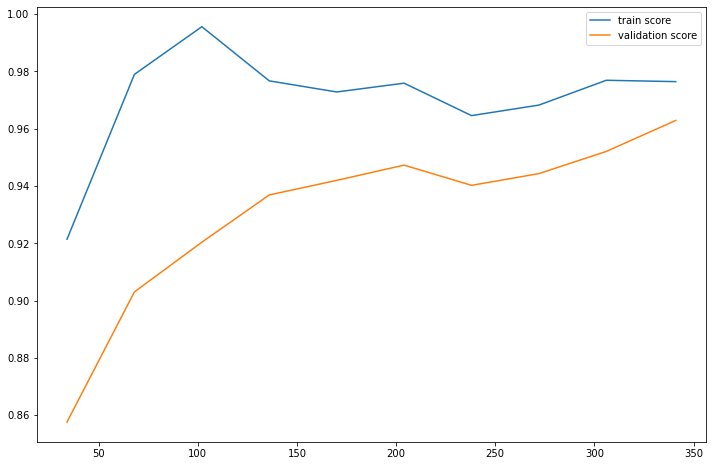

In [119]:
evaluation(grid)

In [120]:
grid.best_params_

{'pipeline__selectkbest__k': 76,
 'pipeline__polynomialfeatures__degree': 2,
 'linearsvc__penalty': 'l2',
 'linearsvc__C': 0.5}

In [ ]:
grid=GridSearchCV(linear, hyper_params, scoring='recall', cv=4)
grid.fit(x_train, y_train)
print(grid.best_params_)
y_pred = grid.predict(x_test)
print(classification_report(y_test, y_pred))

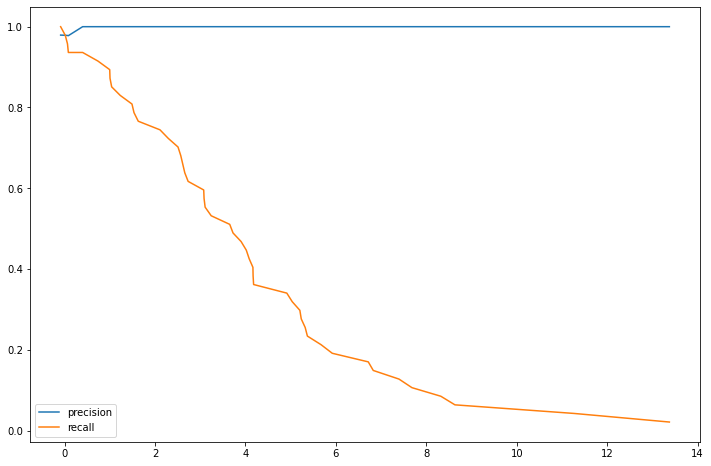

In [124]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(x_test))

plt.figure(figsize=(12,8))
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

def model_final(model, x, threshold=0):
    return model.decision_function(x) > threshold

In [125]:
y_pred = model_final(grid.best_estimator_, x_test, threshold=0)

In [126]:
f1_score(y_test, y_pred)

0.9787234042553191

In [127]:
recall_score(y_test, y_pred)

0.9787234042553191

In [130]:
y_pred = model_final(grid.best_estimator_, x_test, threshold=0)

In [131]:
y_pred

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True, False, False,  True, False, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True,  True, False,  True, False, False,
        True, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
       False,  True, False,  True,  True,  True, False, False,  True,
       False,  True,  True, False, False, False, False, False,  True,
        True,  True, False,  True, False, False, False,  True,  True,
       False,  True,  True,  True, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True, False,  True,  True, False])

In [133]:
y_test

512    1
457    0
439    0
298    0
37     0
      ..
213    1
519    0
432    1
516    1
500    0
Name: diagnosis, Length: 114, dtype: int64